## 분석2: 큰 업종별로 나눠서 소비 변화율 확인
    업종분류
    1.종합소매(5)
      : 백화점, 대형마트/ 유통전문점, 슈퍼마켓, 편의점, 면세점
    2.전자상거래/ 통신판매
    3.식료품(2)
      : 일반식료품, 건강보조식품
    4.의류/잡화(4)
      : 의복/직물, 복식잡화, 시계/귀금속/안경, 화장품
    5.연료
    6.가구/ 가전(2)
     : 가구, 가전제품/정보통신기기
    7.의료/보건(2)
      : 종합병원, 일반병의원/기타의료기관
    8.자동차(3)
      : 국산자동차신품, 기타운송수단, 자동차부품 및 정비
    9.여행/교통(3)
      : 여행사/자동차임대, 항공사, 대중교통
    10.오락/문화(2)
      : 스포츠/오락/여가, 서적/문구
    11.교육
    12.숙박/음식(2)
      : 숙박, 음식점
    13.공과금/개인 및 전문 서비스
    14.금융/보험
    15.기타

In [ ]:
# 업종명에서 합계소비는 빼고 확인 (서울의 경우 0번 행에 합계가 있었음)
mask = credit_df['업종명'] != '합계'
df2 = credit_df[mask]
df2.head(3) 

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
1,서울,백화점,1558884,1533836,1649840,1647569,1721394,1579826,1585981,1512464,...,1803957,1931174,1775351,1495184,1540847,1766069,1993851,2120547,2034954,1948790
2,서울,대형마트/유통전문점,2000189,1906961,1958531,1974282,2013845,1935752,1945017,1909669,...,1785718,1872759,1801518,1819156,1831319,1896515,1798696,1907008,1813231,1930281
3,서울,슈퍼마켓,1454884,1395466,1428419,1454497,1488383,1480148,1445230,1470339,...,1313956,1326416,1354326,1398310,1403236,1440681,1328119,1435294,1353245,1407304


In [ ]:
# 세분화된 업종 하나로 합치기
df2 = df2.groupby('업종명').sum()

df2_1 = pd.Series(df2.iloc[[6,7,8,12,-9]].sum(), name='종합소매')
df2_2 = pd.Series(df2.iloc[-1])
df2_3 = pd.Series(df2.iloc[[2,-12]].sum(), name='식료품')
df2_4 = pd.Series(df2.iloc[[9,14,17,-7]].sum(), name='의류/잡화')
df2_5 = pd.Series(df2.iloc[-2])
df2_6 = pd.Series(df2.iloc[:2].sum(), name='가구/가전')
df2_7 = pd.Series(df2.iloc[[-10,-13]].sum(), name='의료/보건')
df2_8 = pd.Series(df2.iloc[[3,4,-11]].sum(), name='자동차')
df2_9 = pd.Series(df2.iloc[[5,15,-8]].sum(), name='여행/교통')
df2_10 = pd.Series(df2.iloc[[10,13]].sum(), name='오락/문화')
df2_11 = pd.Series(df2.iloc[-5])
df2_12 = pd.Series(df2.iloc[[11,-15]].sum(), name='숙박/음식')
df2_13 = pd.Series(df2.iloc[-6])
df2_14 = pd.Series(df2.iloc[-4])
df2_15 = pd.Series(df2.iloc[-3])

# 시리즈 병합
df2_sum = pd.merge(df2_1,df2_2,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_3 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_4 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_5 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_6 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_7 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_8 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_9 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_10 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_11 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_12 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_13 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_14 ,left_index = True, right_index = True)
df2_sum = pd.merge( df2_sum,df2_15 ,left_index = True, right_index = True)
df2_sum


,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,공과금/개인 및 전문 서비스,금융/보험,기타
2019/01,21670385,24501405,2705516,3654523,8087264,4073814,11721910,7082908,4023103,3840357,3672663,16577624,17150880,5592515,10600198
2019/02,21593609,23824709,2780657,3577247,7916788,4156798,10951771,6987653,3742783,3935531,3837840,15984464,13514761,5733950,10467748
2019/03,21606168,24973727,2268401,4005744,8144693,4613805,11248452,8307113,3582329,4679619,3873995,16654854,13080411,5902127,10596874
2019/04,22054333,24986644,2325346,4003535,8349660,4227501,11229359,8210055,3894347,4564882,3306508,16761285,14797121,5916933,10676618
2019/05,22945548,25216343,2454519,4248827,8762202,4606855,11381384,7996274,3832775,4831718,3659837,17699379,14108114,5898990,11096821
2019/06,22304907,24283869,2364147,3927743,8612833,4100260,11246616,7521569,3734596,4685385,3662348,17499907,14666556,5889770,10814642
2019/07,22252022,25280610,2191255,3574519,8279829,4237054,11264868,7487840,4013878,4473573,3742904,17515771,17919163,6138327,10698131
2019/08,22245192,24387161,2425572,3293411,8867016,4142863,11452791,7367186,3681285,4410501,4066497,18464203,14354878,5943741,10946263
2019/09,23980806,25394919,3173672,3583960,8351652,3765666,10518831,7083933,3387674,4332536,3551480,16310760,16007496,5982894,10978609
2019/10,22064437,26426145,2489022,4076634,8655998,3797399,11709987,7894434,3700944,4745814,3484900,17407836,16485820,6203511,11176777


In [ ]:
# 월별 컬럼 추가해주기
df2_sum = df2_sum.reset_index()
df2_sum.rename(columns={'index' : '월별'}, inplace=True)
df2_sum

,월별,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,공과금/개인 및 전문 서비스,금융/보험,기타
0,2019/01,21670385,24501405,2705516,3654523,8087264,4073814,11721910,7082908,4023103,3840357,3672663,16577624,17150880,5592515,10600198
1,2019/02,21593609,23824709,2780657,3577247,7916788,4156798,10951771,6987653,3742783,3935531,3837840,15984464,13514761,5733950,10467748
2,2019/03,21606168,24973727,2268401,4005744,8144693,4613805,11248452,8307113,3582329,4679619,3873995,16654854,13080411,5902127,10596874
3,2019/04,22054333,24986644,2325346,4003535,8349660,4227501,11229359,8210055,3894347,4564882,3306508,16761285,14797121,5916933,10676618
4,2019/05,22945548,25216343,2454519,4248827,8762202,4606855,11381384,7996274,3832775,4831718,3659837,17699379,14108114,5898990,11096821
5,2019/06,22304907,24283869,2364147,3927743,8612833,4100260,11246616,7521569,3734596,4685385,3662348,17499907,14666556,5889770,10814642
6,2019/07,22252022,25280610,2191255,3574519,8279829,4237054,11264868,7487840,4013878,4473573,3742904,17515771,17919163,6138327,10698131
7,2019/08,22245192,24387161,2425572,3293411,8867016,4142863,11452791,7367186,3681285,4410501,4066497,18464203,14354878,5943741,10946263
8,2019/09,23980806,25394919,3173672,3583960,8351652,3765666,10518831,7083933,3387674,4332536,3551480,16310760,16007496,5982894,10978609
9,2019/10,22064437,26426145,2489022,4076634,8655998,3797399,11709987,7894434,3700944,4745814,3484900,17407836,16485820,6203511,11176777


In [ ]:
# 거리두기 on 과 거리두기 off 로 쪼개기

# 거리두기 on
df2 = df2_sum
df2_on = df2[df2['월별'] > '2020/02'].reset_index(drop=True)

# 거리두기 off
df2_off = df2[df2['월별'] <= '2020/02']

df2_on

,월별,종합소매,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,오락/문화,교육,숙박/음식,공과금/개인 및 전문 서비스,금융/보험,기타
0,2020/03,19998199,30182734,2491087,2549263,7525841,4094539,10015898,9065138,819821,3125077,2062753,12217211,14034563,6820700,10210961
1,2020/04,20571684,29845497,2625914,3047487,7059944,4205492,11137008,10272988,1292026,3798151,2617707,13978202,15355716,6798747,10947470
2,2020/05,22278841,30201793,2948729,4005055,6616227,4984087,11360357,10624323,1628651,4728899,3116450,16738159,14352804,6670526,11098240
3,2020/06,22275702,31705274,2479603,3602545,7017664,5177149,11631099,11864388,1817662,4394354,3083230,15878460,15365089,7028316,11320688
4,2020/07,20726191,30936470,2460389,3083801,7076607,4369144,11839939,9900254,1992381,4086079,3285015,16143026,19801313,7029295,11483480
5,2020/08,22281352,31374260,2632636,2683035,7209682,5068987,11087945,8079321,1757150,3803393,3426218,16291471,16378433,6648982,10881114
6,2020/09,23771797,34314192,3644940,2949866,7204034,4342779,11891561,10430882,1551465,3583913,2912220,13206770,18471469,6974139,11844435
7,2020/10,22315327,32383615,2833587,3478088,7044798,3967129,10846741,9542619,1830248,4491526,3028646,15064097,17668437,6861885,11237442
8,2020/11,23362564,35524633,2871235,3446002,7337857,4558636,11436560,10418152,1976151,4271283,3189022,15079755,16815587,7016439,11631964
9,2020/12,21934247,36813663,2913350,2880309,7436671,3923305,11847756,10067426,1363880,2839329,2634220,10649390,17392839,7288563,11246527


In [ ]:
# 거리두기 on의 평균매출
df2_on.iloc[:,1:].mean()

종합소매               2.278605e+07
전자상거래/통신판매         3.603856e+07
식료품                3.019201e+06
의류/잡화              3.232344e+06
연료                 8.103020e+06
가구/가전              4.379681e+06
의료/보건              1.196967e+07
자동차                9.504337e+06
여행/교통              1.813057e+06
오락/문화              4.104312e+06
교육                 3.229342e+06
숙박/음식              1.449337e+07
공과금/개인 및 전문 서비스    1.808266e+07
금융/보험              7.163205e+06
기타                 1.181238e+07
dtype: float64

In [ ]:
# 거리두기 off의 평균매출
df2_off.iloc[:,1:].mean()

종합소매               2.220879e+07
전자상거래/통신판매         2.607574e+07
식료품                2.583775e+06
의류/잡화              3.736481e+06
연료                 8.518386e+06
가구/가전              4.122964e+06
의료/보건              1.146648e+07
자동차                7.598033e+06
여행/교통              3.648483e+06
오락/문화              4.337241e+06
교육                 3.665948e+06
숙박/음식              1.695685e+07
공과금/개인 및 전문 서비스    1.558394e+07
금융/보험              6.051135e+06
기타                 1.099224e+07
dtype: float64

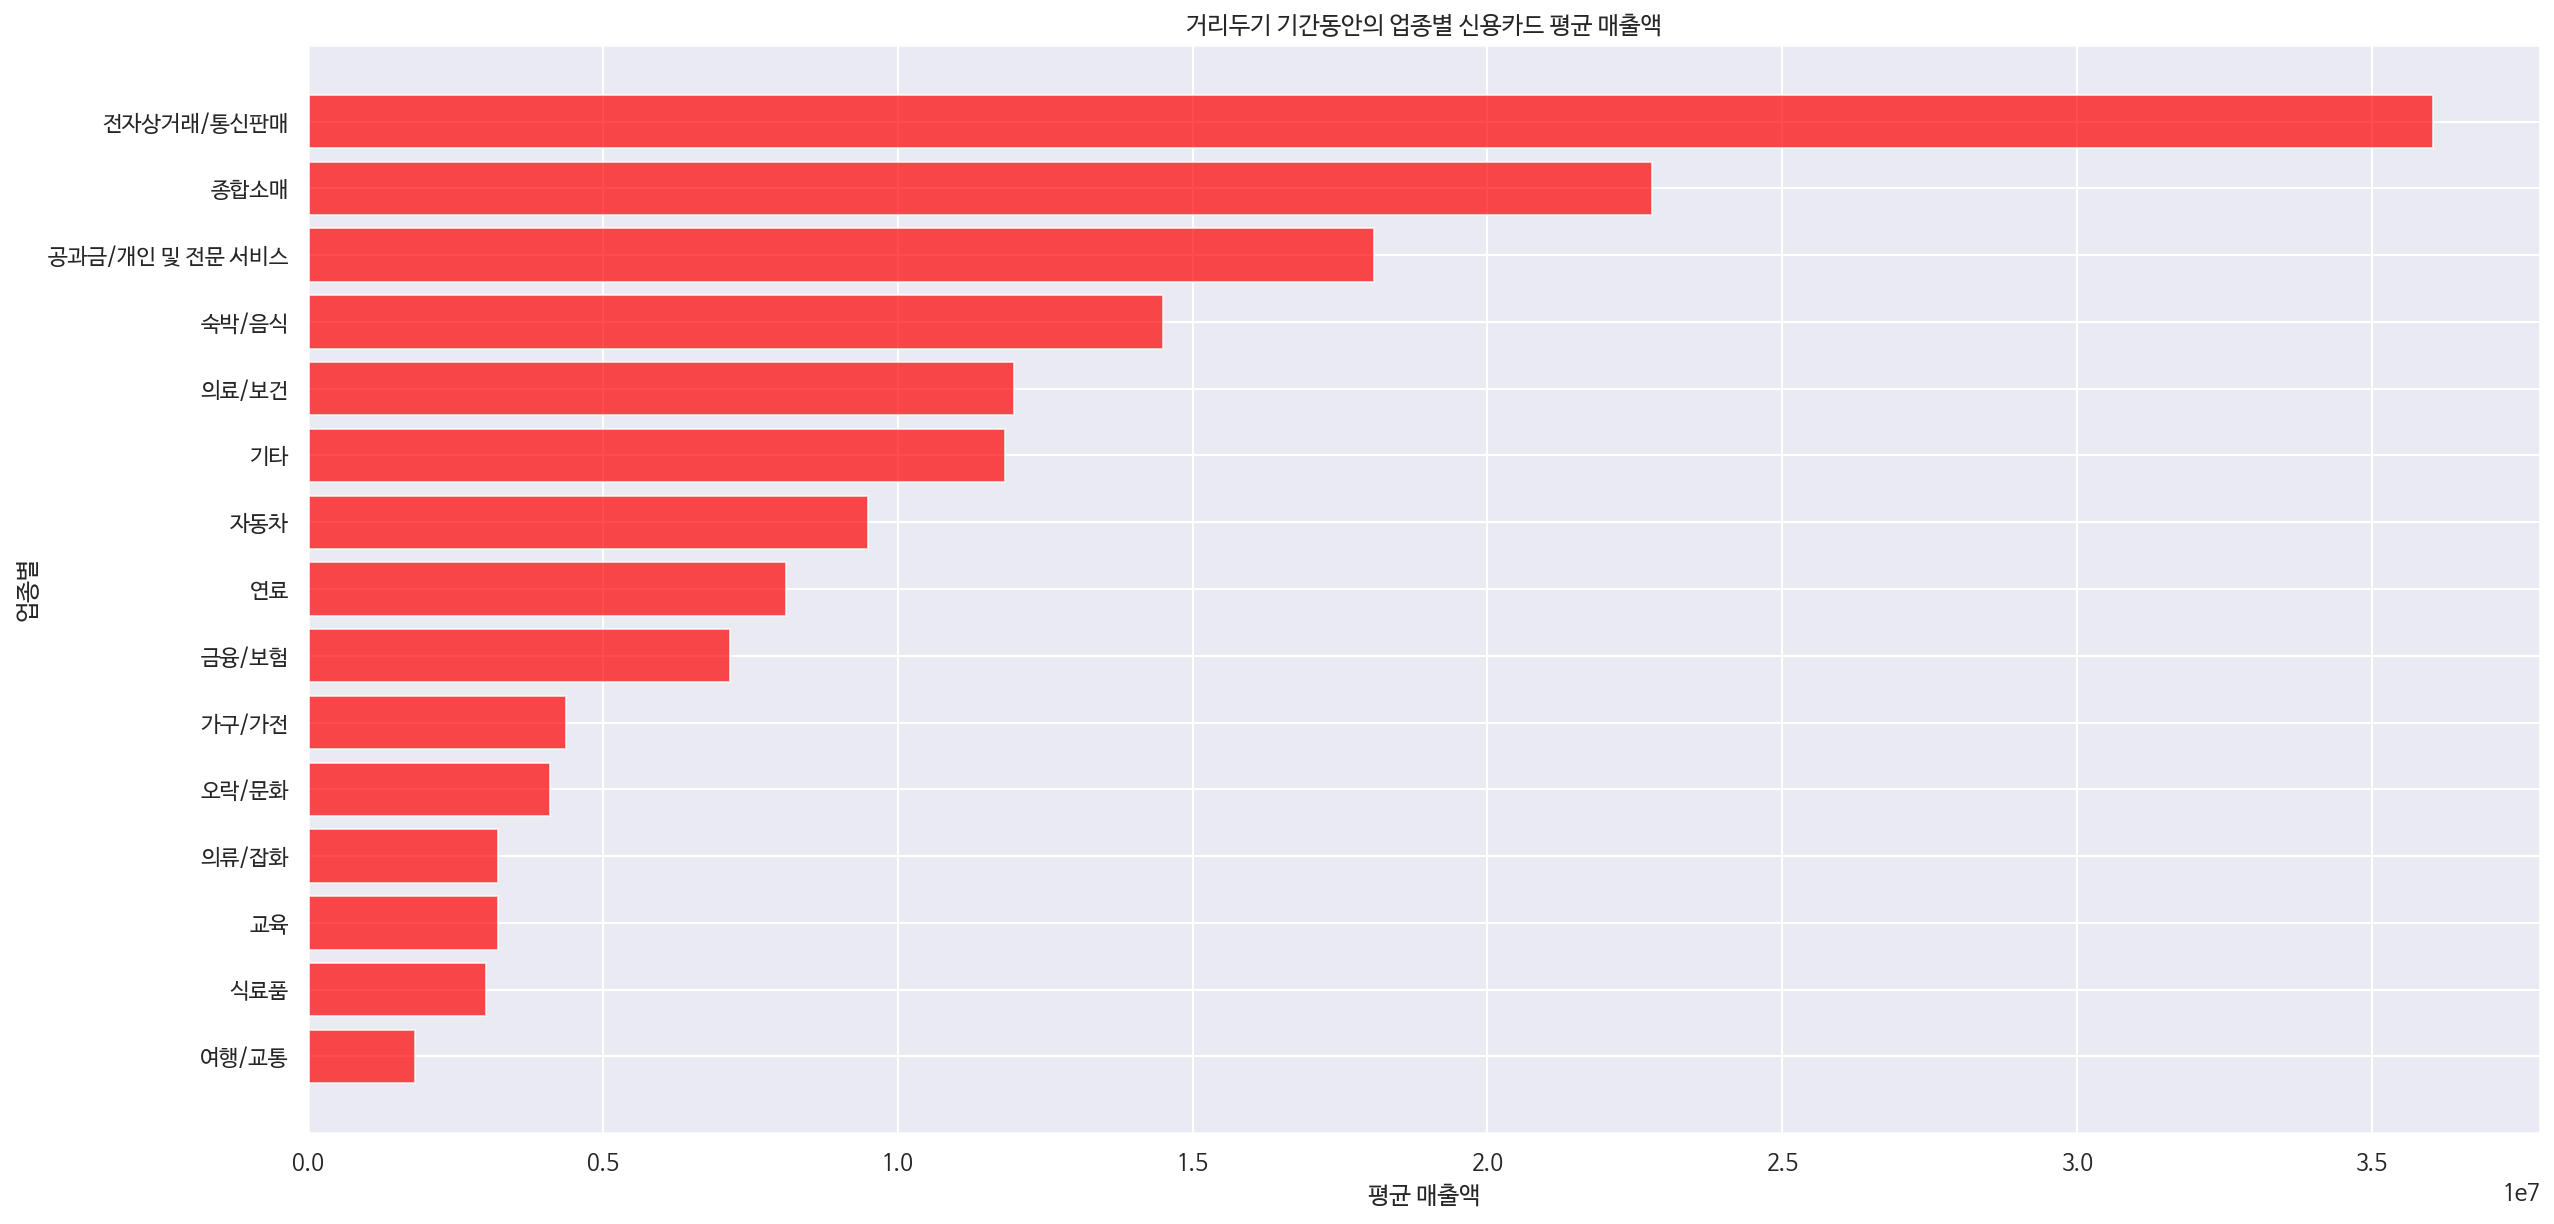

In [ ]:
# 테스트 - 거리두기 on 시각화 - 오름차순 정렬 사용
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20,10))


y= df2_on.iloc[:,1:].mean().sort_values()

x = y.reset_index()['index']

plt.barh(x, y, align='center', alpha=0.7, color='red')

plt.xlabel('평균 매출액')
plt.ylabel('업종별')
plt.title('거리두기 기간동안의 업종별 신용카드 평균 매출액')
plt.show()

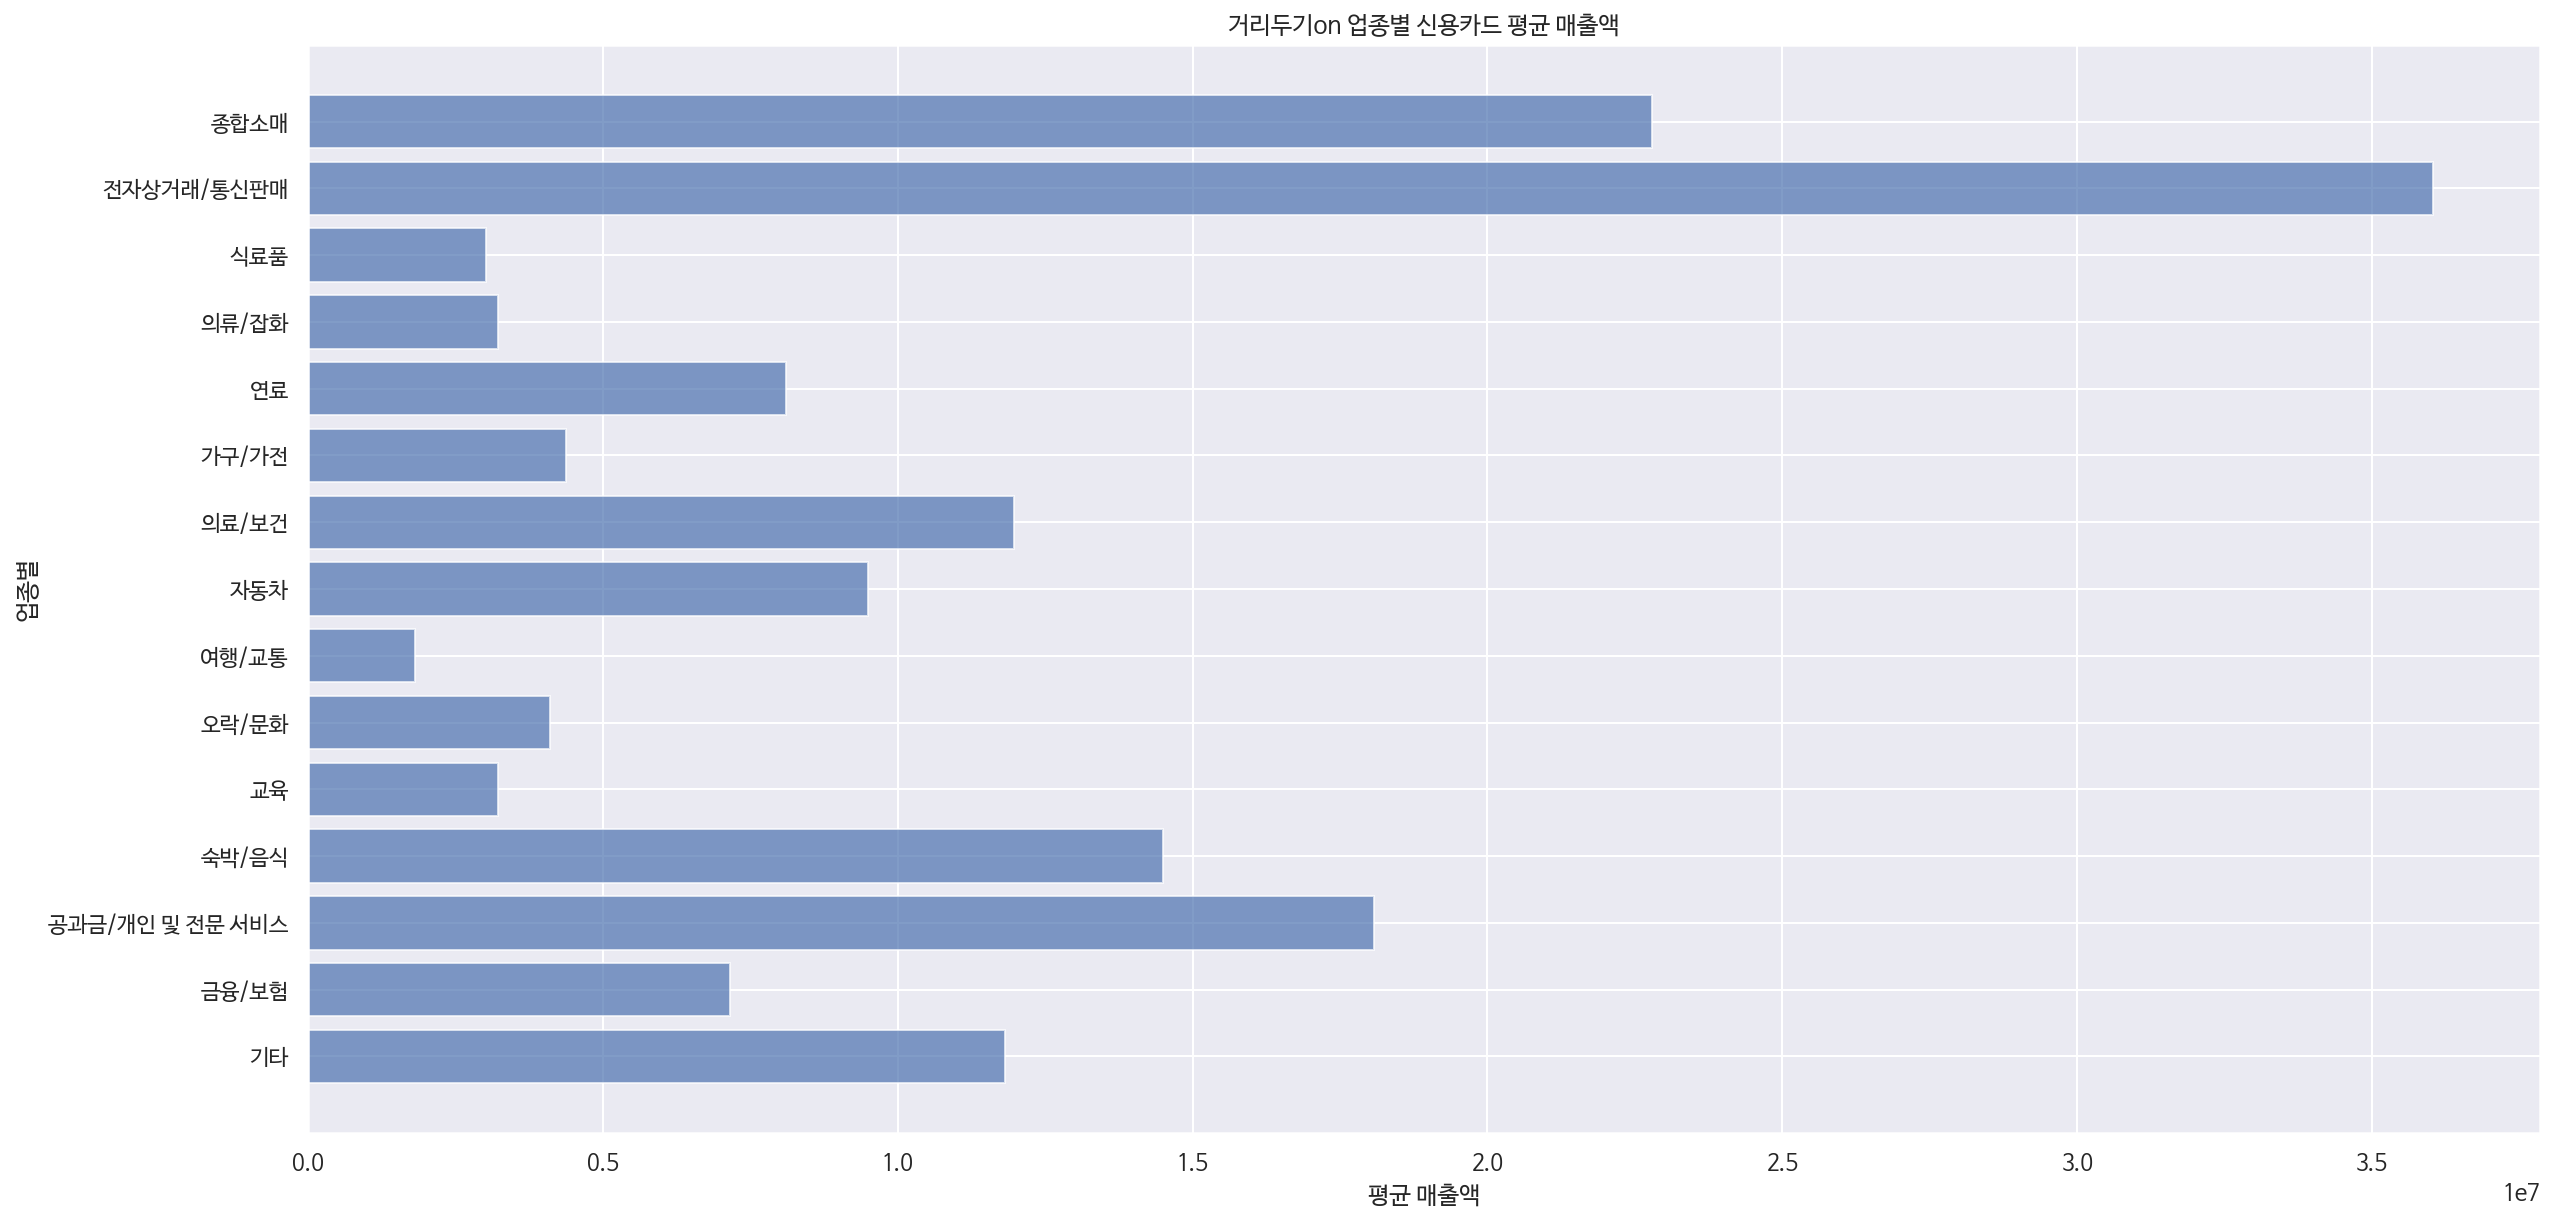

In [ ]:
# 거리두기 on만
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20,10))

x = df2_on.iloc[:,1:].mean()[::-1]
y = df2_on.iloc[:,1:].columns[::-1]

plt.barh(y, x,align='center', alpha=0.7)

plt.xlabel('평균 매출액')
plt.ylabel('업종별')
plt.title('거리두기on 업종별 신용카드 평균 매출액')
plt.show()

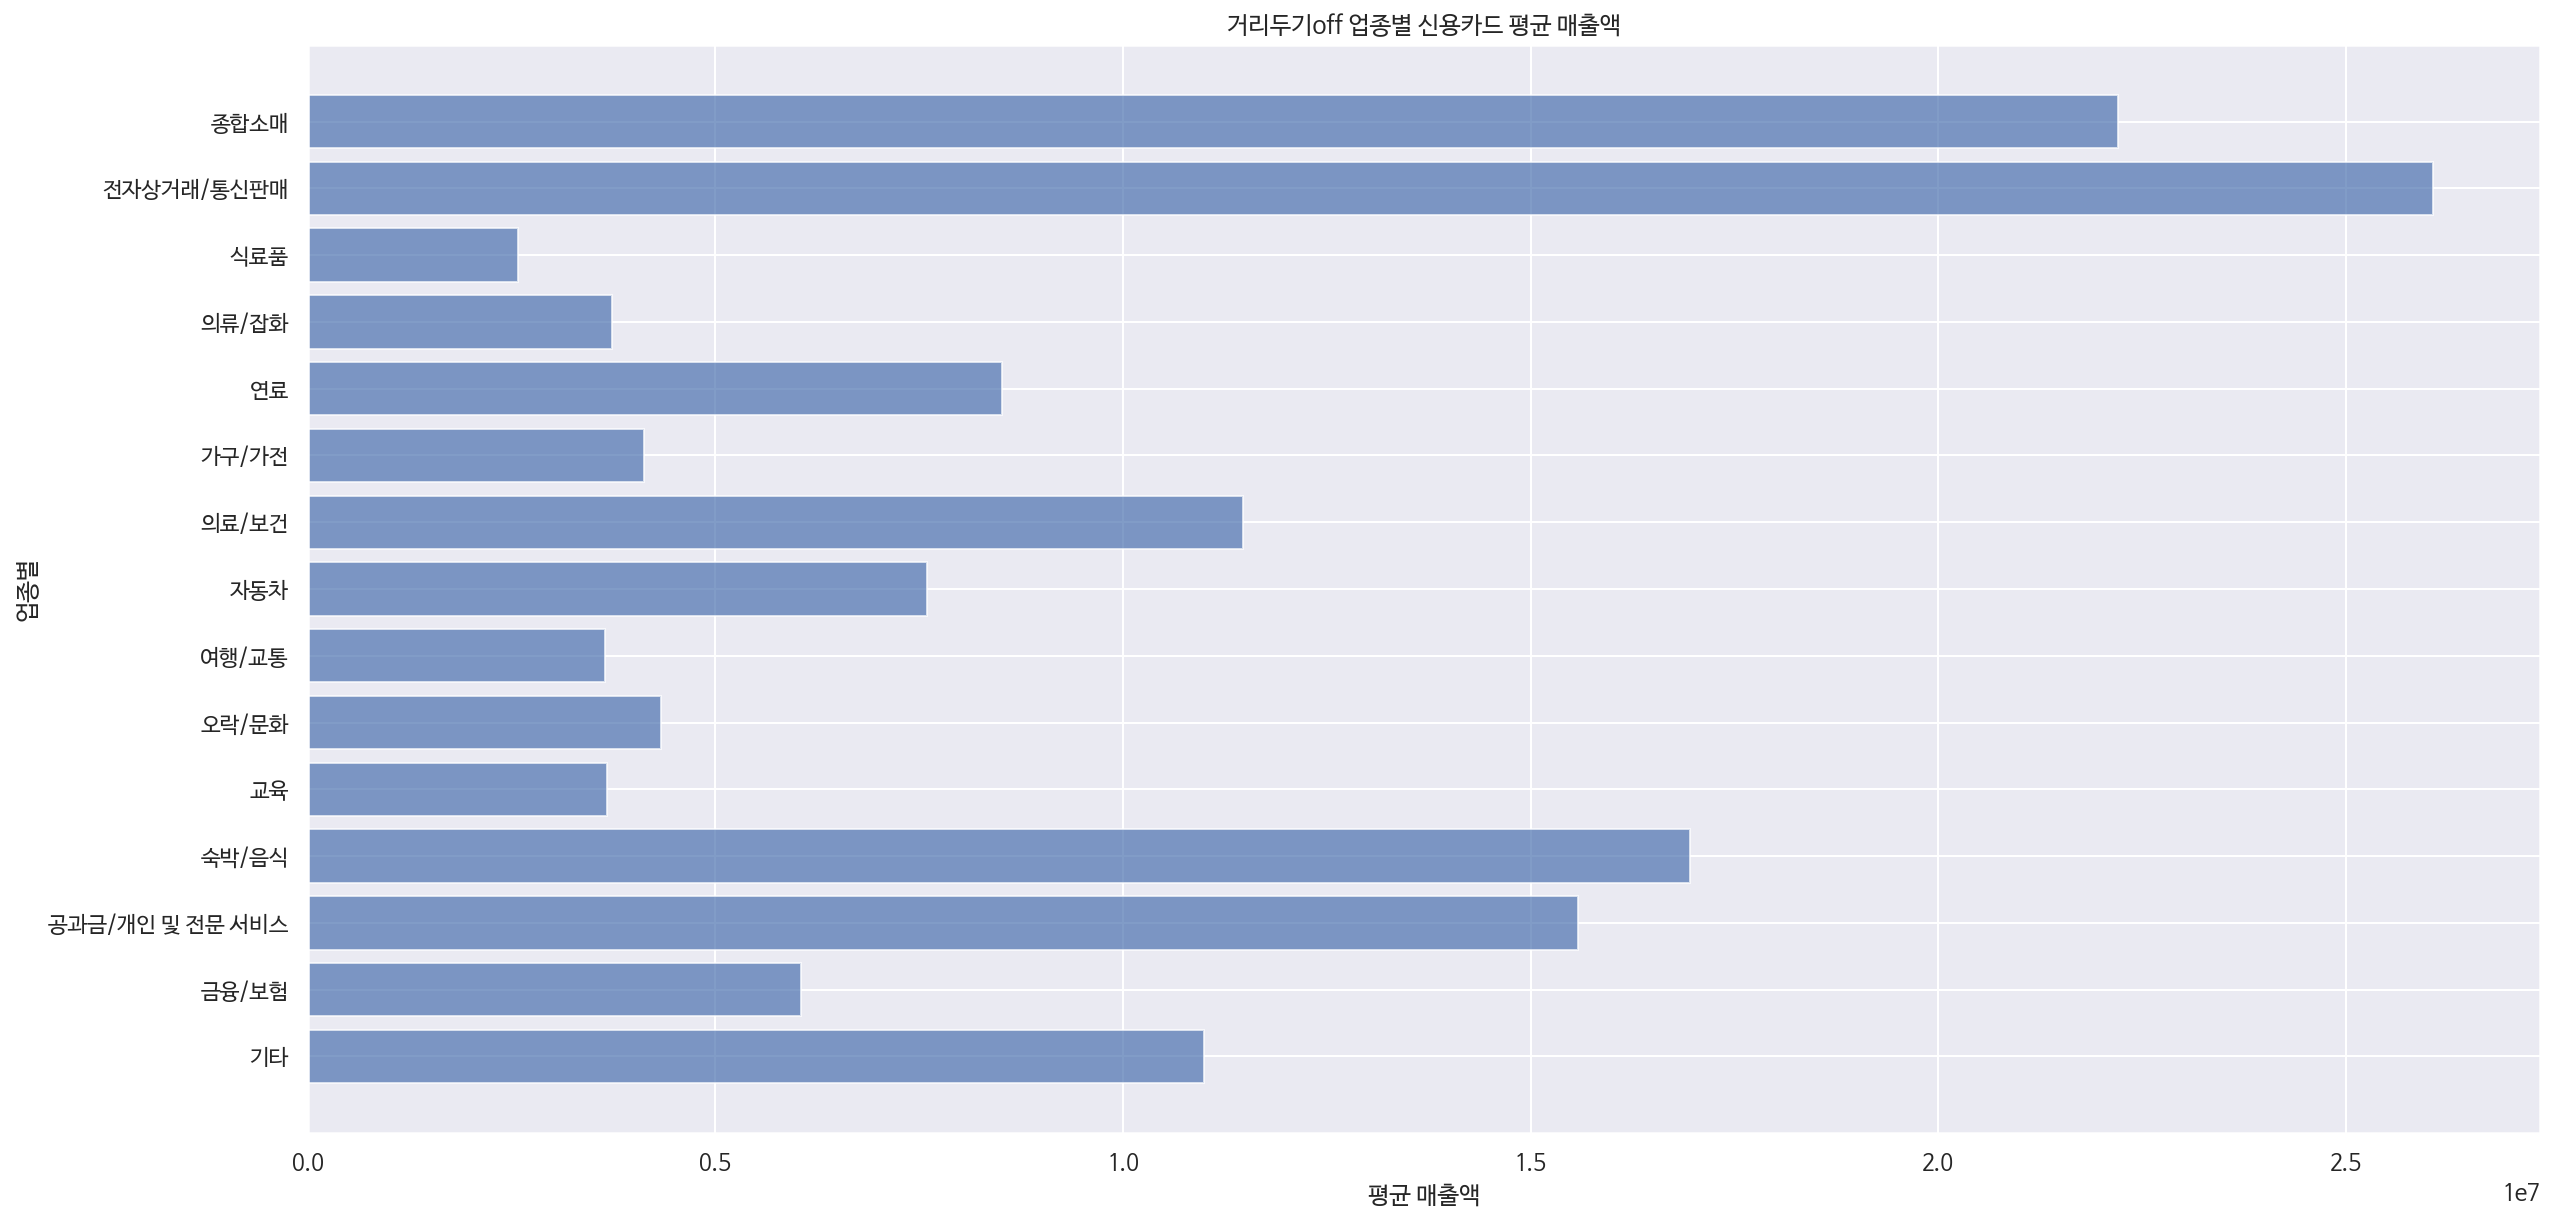

In [ ]:
# 거리두기 off만
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20,10))

x = df2_off.iloc[:,1:].mean()[::-1]
y = df2_on.iloc[:,1:].columns[::-1]

plt.barh(y, x,align='center', alpha=0.7)

plt.xlabel('평균 매출액')
plt.ylabel('업종별')
plt.title('거리두기off 업종별 신용카드 평균 매출액')
plt.show()

### 시각화

In [ ]:
# 시각화-barh plot으로 비교 확인
plt.rc('font', family='NanumBarunGothic')

x_1 = df2_on.iloc[:,1:].mean()[::-1]
x_2 = df2_off.iloc[:,1:].mean()[::-1]

#y = df2_on.iloc[:,1:].columns[::-1]
y = list(df2_on.iloc[:,1:].columns[::-1])
y_ar = np.arange(len(y))


width = 0.4
#height = 1
fig, axes = plt.subplots()
fig.set_size_inches((20, 10))

axes.barh(y_ar - width/2 , x_1, width ,align='center', alpha=0.5)
axes.barh(y_ar + width/2, x_2, width , align='center', alpha=0.8)

# yticks 설정
axes.set_yticklabels(y)
#plt.yticks(y)

plt.xlabel('평균 매출액',fontsize=15)
plt.ylabel('업종별',fontsize=15)
plt.title('업종별 신용카드 월평균 매출액',fontsize=20)
plt.legend(['거리두기on','거리두기off'])
plt.tight_layout()
plt.show()

### 시각화2

In [ ]:
df2mean_onoff.index[:].to_list()

['종합소매',
 '전자상거래/통신판매',
 '식료품',
 '의류/잡화',
 '연료',
 '가구/가전',
 '의료/보건',
 '자동차',
 '여행/교통',
 '오락/문화',
 '교육',
 '숙박/음식',
 '공과금/개인 및 전문 서비스',
 '금융/보험',
 '기타']

In [ ]:
df2mean_onoff['증감률'].to_list()

[2.6,
 38.21,
 16.85,
 -13.49,
 -4.88,
 6.23,
 4.39,
 25.09,
 -50.31,
 -5.37,
 -11.91,
 -14.53,
 16.03,
 18.38,
 7.46]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


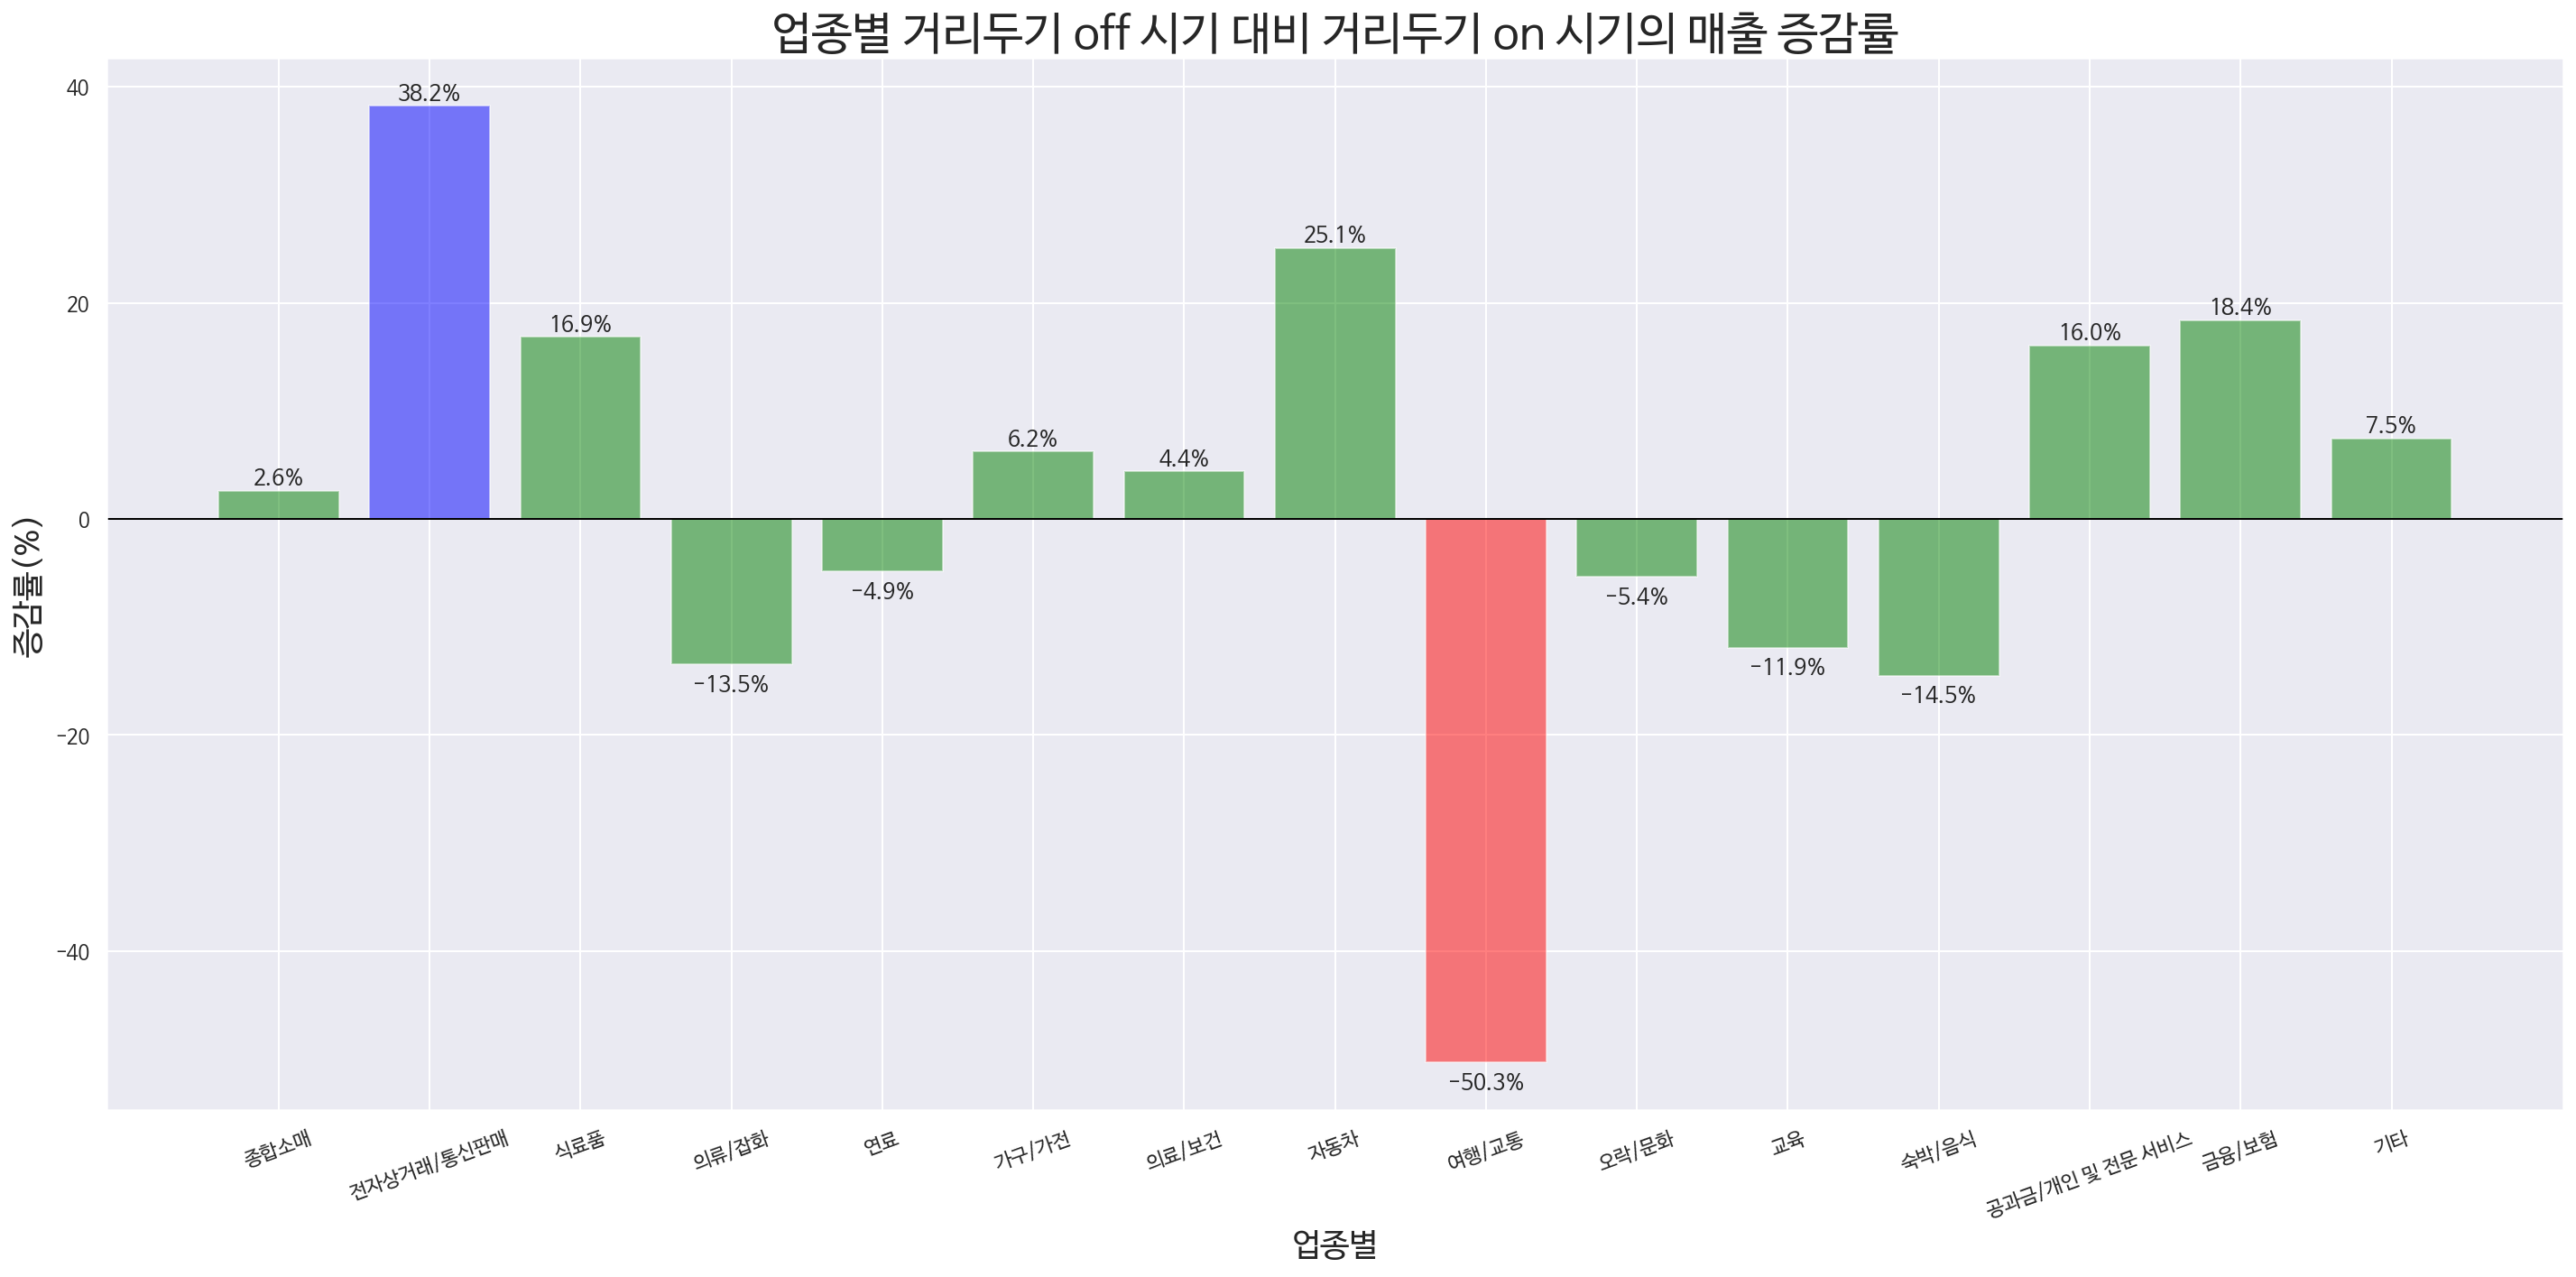

In [ ]:
# 증감률 시각화
plt.rc('font', family='NanumBarunGothic')

x = df2mean_onoff.index[:].to_list()
y = df2mean_onoff['증감률'].to_list()

plt.figure(figsize=(20,10))
xtick_label_position = list(range(len(x)))
axes = fig.add_subplot()

colors = ['green' for _ in range(len(x))]
colors[1] = 'blue'
colors[8] = 'red' 

bars = plt.bar(x, y, align='center', color = colors ,alpha=0.5)

plt.rcParams['axes.unicode_minus'] = False  #음수기호 깨짐 방지

plt.xticks(rotation = 20)
plt.axhline(y=0, color='black', linewidth=1)

for rect in bars:
    height = rect.get_height()
    if height < 0:
      plt.text(rect.get_x() + rect.get_width()/2.0, height- 3.0, '%.1f%%' % height, ha='center', va='bottom', size = 12)
    else:
      plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='center', va='bottom', size = 12)


plt.xlabel('업종별',fontsize=18)
plt.ylabel('증감률(%)',fontsize=18)
plt.title('업종별 거리두기 off 시기 대비 거리두기 on 시기의 매출 증감률',fontsize = 25)
plt.tight_layout()
plt.show()

## 분석3 : 세분화된 업종으로 거리두기 on ,off 의 소비차이 확인하기

### 데이터 정제1

In [ ]:
# 평균 매출액 합계를 정수타입으로 구하기위해 타입캐스팅 해준다.
df2mean_onoff.iloc[:, :-1] = df2mean_onoff.iloc[:, :-1].astype(int)
df2mean_onoff

,off,on,증감률
종합소매,22208793,22786045,2.60
전자상거래/통신판매,26075736,36038560,38.21
식료품,2583774,3019201,16.85
의류/잡화,3736481,3232344,-13.49
연료,8518386,8103019,-4.88
가구/가전,4122963,4379681,6.23
의료/보건,11466482,11969667,4.39
자동차,7598033,9504336,25.09
여행/교통,3648483,1813057,-50.31
오락/문화,4337240,4104311,-5.37


In [ ]:
# 평균 매출 합계 구해서 칼럼에 추가 후 비중 구하기

# off 합계
df2mean_onoff['off 합계'] = df2mean_onoff['off'].sum()

# on 합계
df2mean_onoff['on 합계'] = df2mean_onoff['on'].sum()

# off 비중
df2mean_onoff['off 비중'] = df2mean_onoff['off'] /df2mean_onoff['off 합계'] *100

# on 비중
df2mean_onoff['on 비중'] = df2mean_onoff['on'] /df2mean_onoff['on 합계'] *100

# 비중 변화비 (off->of)
df2mean_onoff['off->on 비중변화비'] = df2mean_onoff['on 비중'] / df2mean_onoff['off 비중']

df2mean_onoff

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
종합소매,22208793,22786045,2.60,147546482,159731180,15.052065,14.265246,0.947727
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.672896,22.562007,1.276645
식료품,2583774,3019201,16.85,147546482,159731180,1.751159,1.890176,1.079386
의류/잡화,3736481,3232344,-13.49,147546482,159731180,2.532409,2.023615,0.799087
연료,8518386,8103019,-4.88,147546482,159731180,5.773358,5.072910,0.878676
가구/가전,4122963,4379681,6.23,147546482,159731180,2.794349,2.741907,0.981233
의료/보건,11466482,11969667,4.39,147546482,159731180,7.771437,7.493632,0.964253
자동차,7598033,9504336,25.09,147546482,159731180,5.149586,5.950207,1.155473
여행/교통,3648483,1813057,-50.31,147546482,159731180,2.472769,1.135068,0.459027
오락/문화,4337240,4104311,-5.37,147546482,159731180,2.939575,2.569511,0.874110


In [ ]:
# 실수 -> 반올림하기
df2mean_onoff['off 비중'] = np.round(df2mean_onoff['off 비중'], 1)
df2mean_onoff['on 비중'] = np.round(df2mean_onoff['on 비중'], 1)
df2mean_onoff['off->on 비중변화비'] = np.round(df2mean_onoff['off->on 비중변화비'], 2)
df2mean_onoff

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
식료품,2583774,3019201,16.85,147546482,159731180,1.8,1.9,1.08
의류/잡화,3736481,3232344,-13.49,147546482,159731180,2.5,2.0,0.80
연료,8518386,8103019,-4.88,147546482,159731180,5.8,5.1,0.88
가구/가전,4122963,4379681,6.23,147546482,159731180,2.8,2.7,0.98
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
자동차,7598033,9504336,25.09,147546482,159731180,5.1,6.0,1.16
여행/교통,3648483,1813057,-50.31,147546482,159731180,2.5,1.1,0.46
오락/문화,4337240,4104311,-5.37,147546482,159731180,2.9,2.6,0.87


In [ ]:
# off 시기의 평균매출 순위 (6위까지) - 기타 업종은 빼고
df2mean_onoff.sort_values(by='off 비중', ascending=False).head(7)

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
숙박/음식,16956847,14493365,-14.53,147546482,159731180,11.5,9.1,0.79
공과금/개인 및 전문 서비스,15583944,18082664,16.03,147546482,159731180,10.6,11.3,1.07
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
기타,10992239,11812384,7.46,147546482,159731180,7.5,7.4,0.99
연료,8518386,8103019,-4.88,147546482,159731180,5.8,5.1,0.88


In [ ]:
# on 시기의 평균매출 순위 (6위까지) - 기타 업종은 빼고
df2mean_onoff.sort_values(by='on 비중', ascending=False).head(7)

,off,on,증감률,off 합계,on 합계,off 비중,on 비중,off->on 비중변화비
전자상거래/통신판매,26075736,36038560,38.21,147546482,159731180,17.7,22.6,1.28
종합소매,22208793,22786045,2.60,147546482,159731180,15.1,14.3,0.95
공과금/개인 및 전문 서비스,15583944,18082664,16.03,147546482,159731180,10.6,11.3,1.07
숙박/음식,16956847,14493365,-14.53,147546482,159731180,11.5,9.1,0.79
의료/보건,11466482,11969667,4.39,147546482,159731180,7.8,7.5,0.96
기타,10992239,11812384,7.46,147546482,159731180,7.5,7.4,0.99
자동차,7598033,9504336,25.09,147546482,159731180,5.1,6.0,1.16


In [ ]:
df2mean_onoff['증감률'].sort_values(ascending=False)

전자상거래/통신판매         38.21
자동차                25.09
금융/보험              18.38
식료품                16.85
공과금/개인 및 전문 서비스    16.03
기타                  7.46
가구/가전               6.23
의료/보건               4.39
종합소매                2.60
연료                 -4.88
오락/문화              -5.37
교육                -11.91
의류/잡화             -13.49
숙박/음식             -14.53
여행/교통             -50.31
Name: 증감률, dtype: float64

### 시각화1

In [ ]:
sns.color_palette("binary_r",9)

[(0.09803921568627451, 0.09803921568627451, 0.09803921568627451),
 (0.2, 0.2, 0.2),
 (0.2980392156862745, 0.2980392156862745, 0.2980392156862745),
 (0.4, 0.4, 0.4),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.6, 0.6, 0.6),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8, 0.8, 0.8),
 (0.9019607843137255, 0.9019607843137255, 0.9019607843137255)]

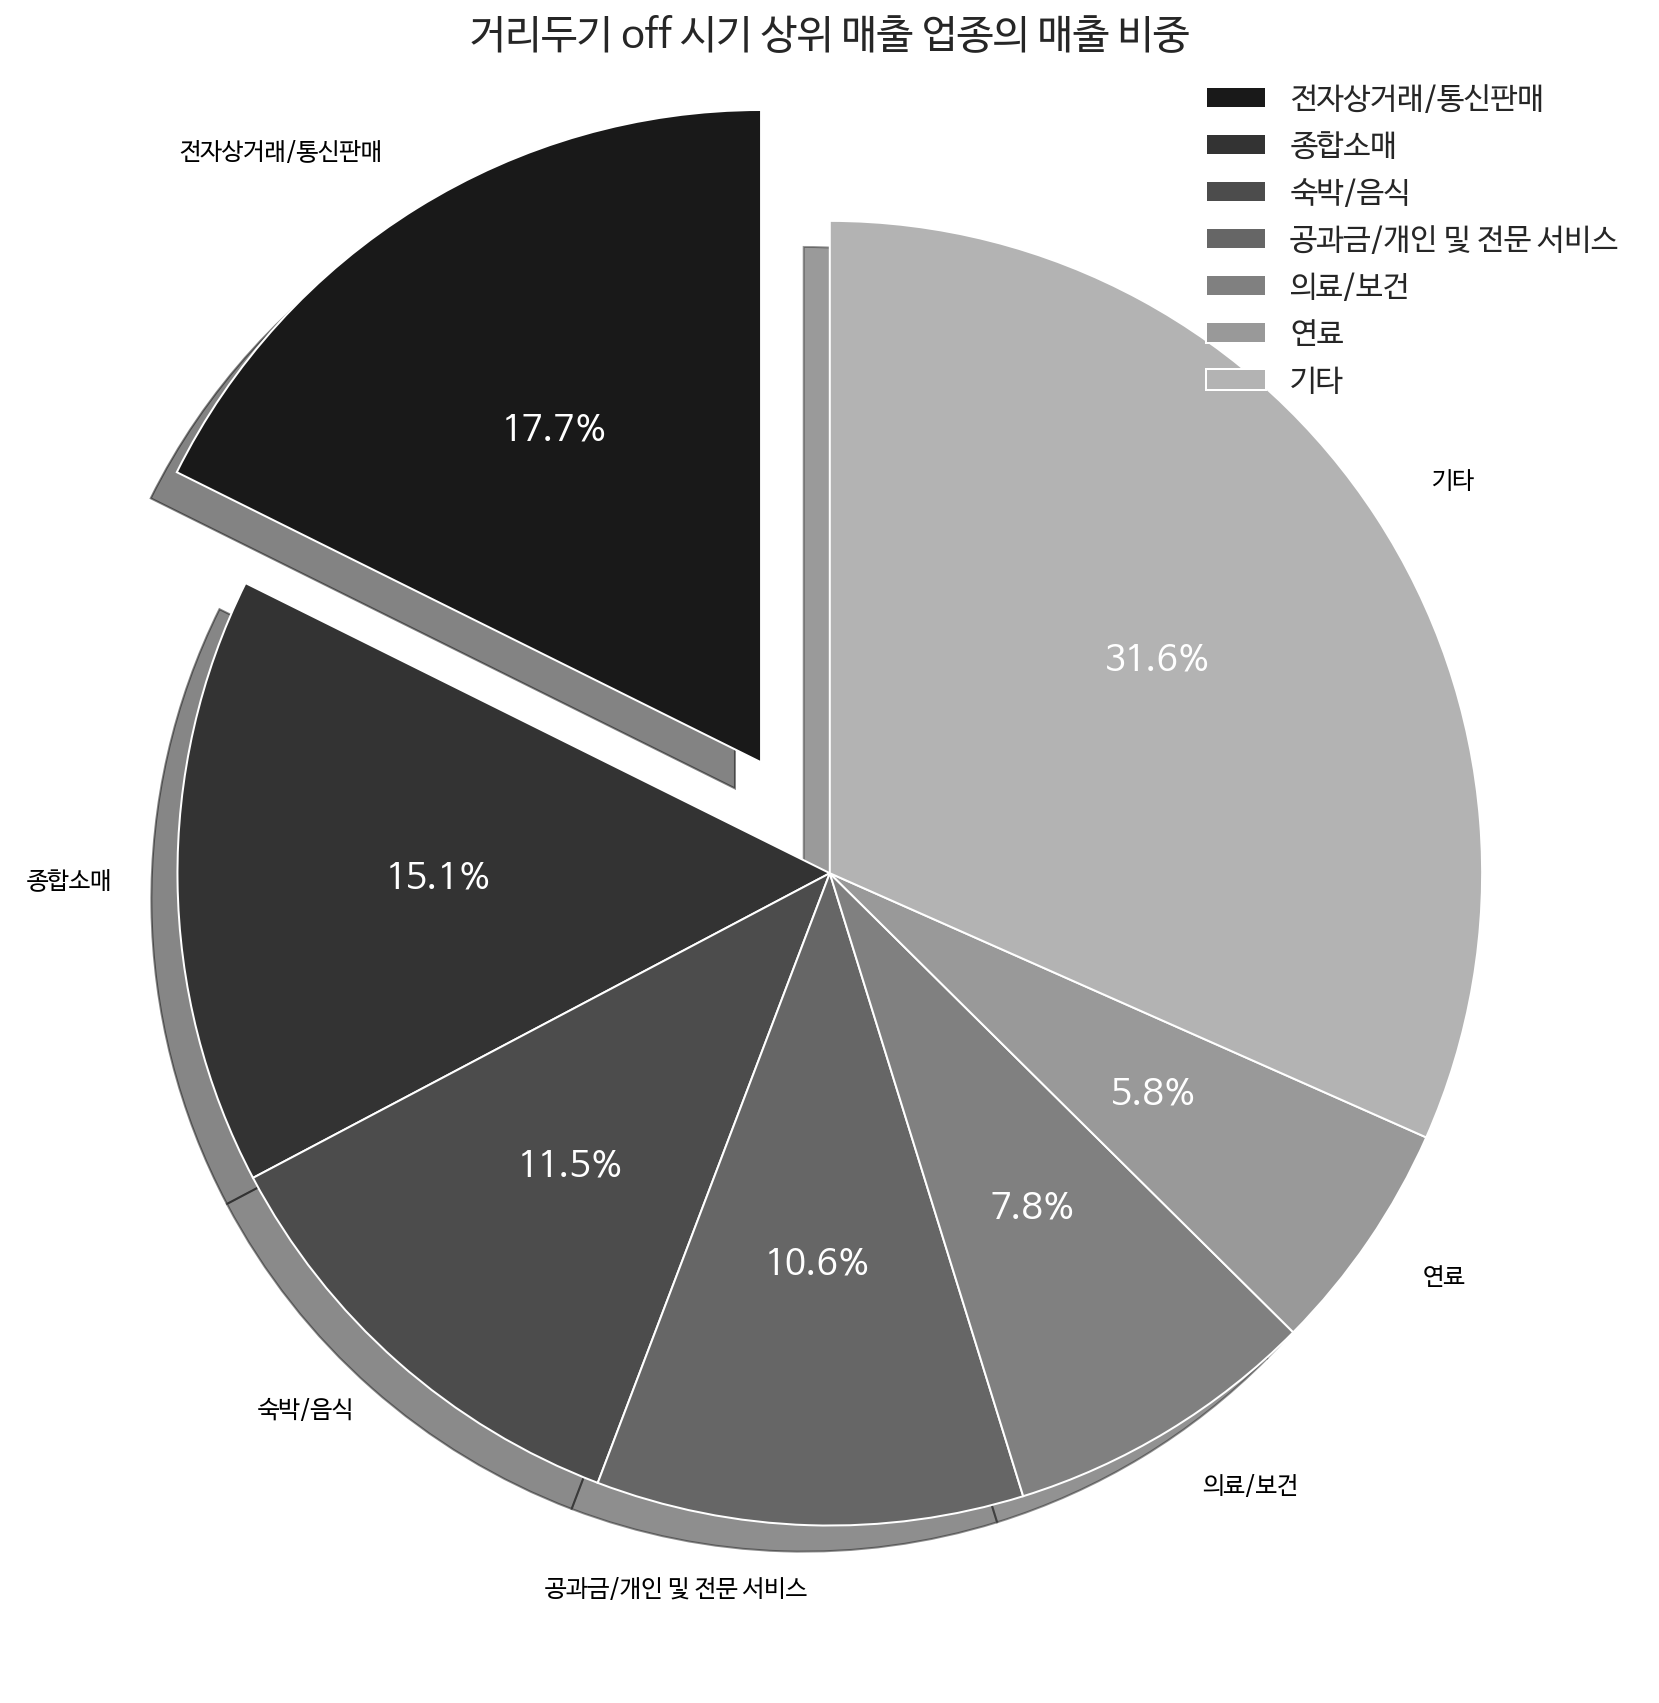

In [ ]:
# 파이차트 - off 비중
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(15, 15))

colors = sns.color_palette("binary_r",9)

labels = list(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[[0,1,2,3,4,6],5].index[:])
labels.append('기타')

sizes = list(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[[0,1,2,3,4,6],5])
sizes.append(df2mean_onoff.sort_values(by='off 비중', ascending=False).iloc[7:,5].sum() + 7.5)  # 나머지 업종들을 다 '기타' 업종으로 묶어서 처리


explode = (0.2, 0, 0, 0, 0, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=90
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(18)
  t.set_color('white')
  
plt.title("거리두기 off 시기 상위 매출 업종의 매출 비중", fontsize = 20)
plt.legend(labels,loc='upper right', frameon=False, fontsize = 15)
plt.show()


In [ ]:
sns.color_palette("coolwarm",9)

[(0.34832334141176474, 0.4657111465098039, 0.8883461629411764),
 (0.48385432959999997, 0.6220498496, 0.9748082026),
 (0.6193179451882354, 0.7441207347647059, 0.9989309188196078),
 (0.753610618, 0.830232851, 0.960871157),
 (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 (0.9473454036, 0.7946955048, 0.7169905058),
 (0.9684997476666667, 0.673977379772549, 0.5566492560470588),
 (0.9318312966, 0.5190855232, 0.4064796086),
 (0.8393649370784314, 0.32185622094117644, 0.26492398098039216)]

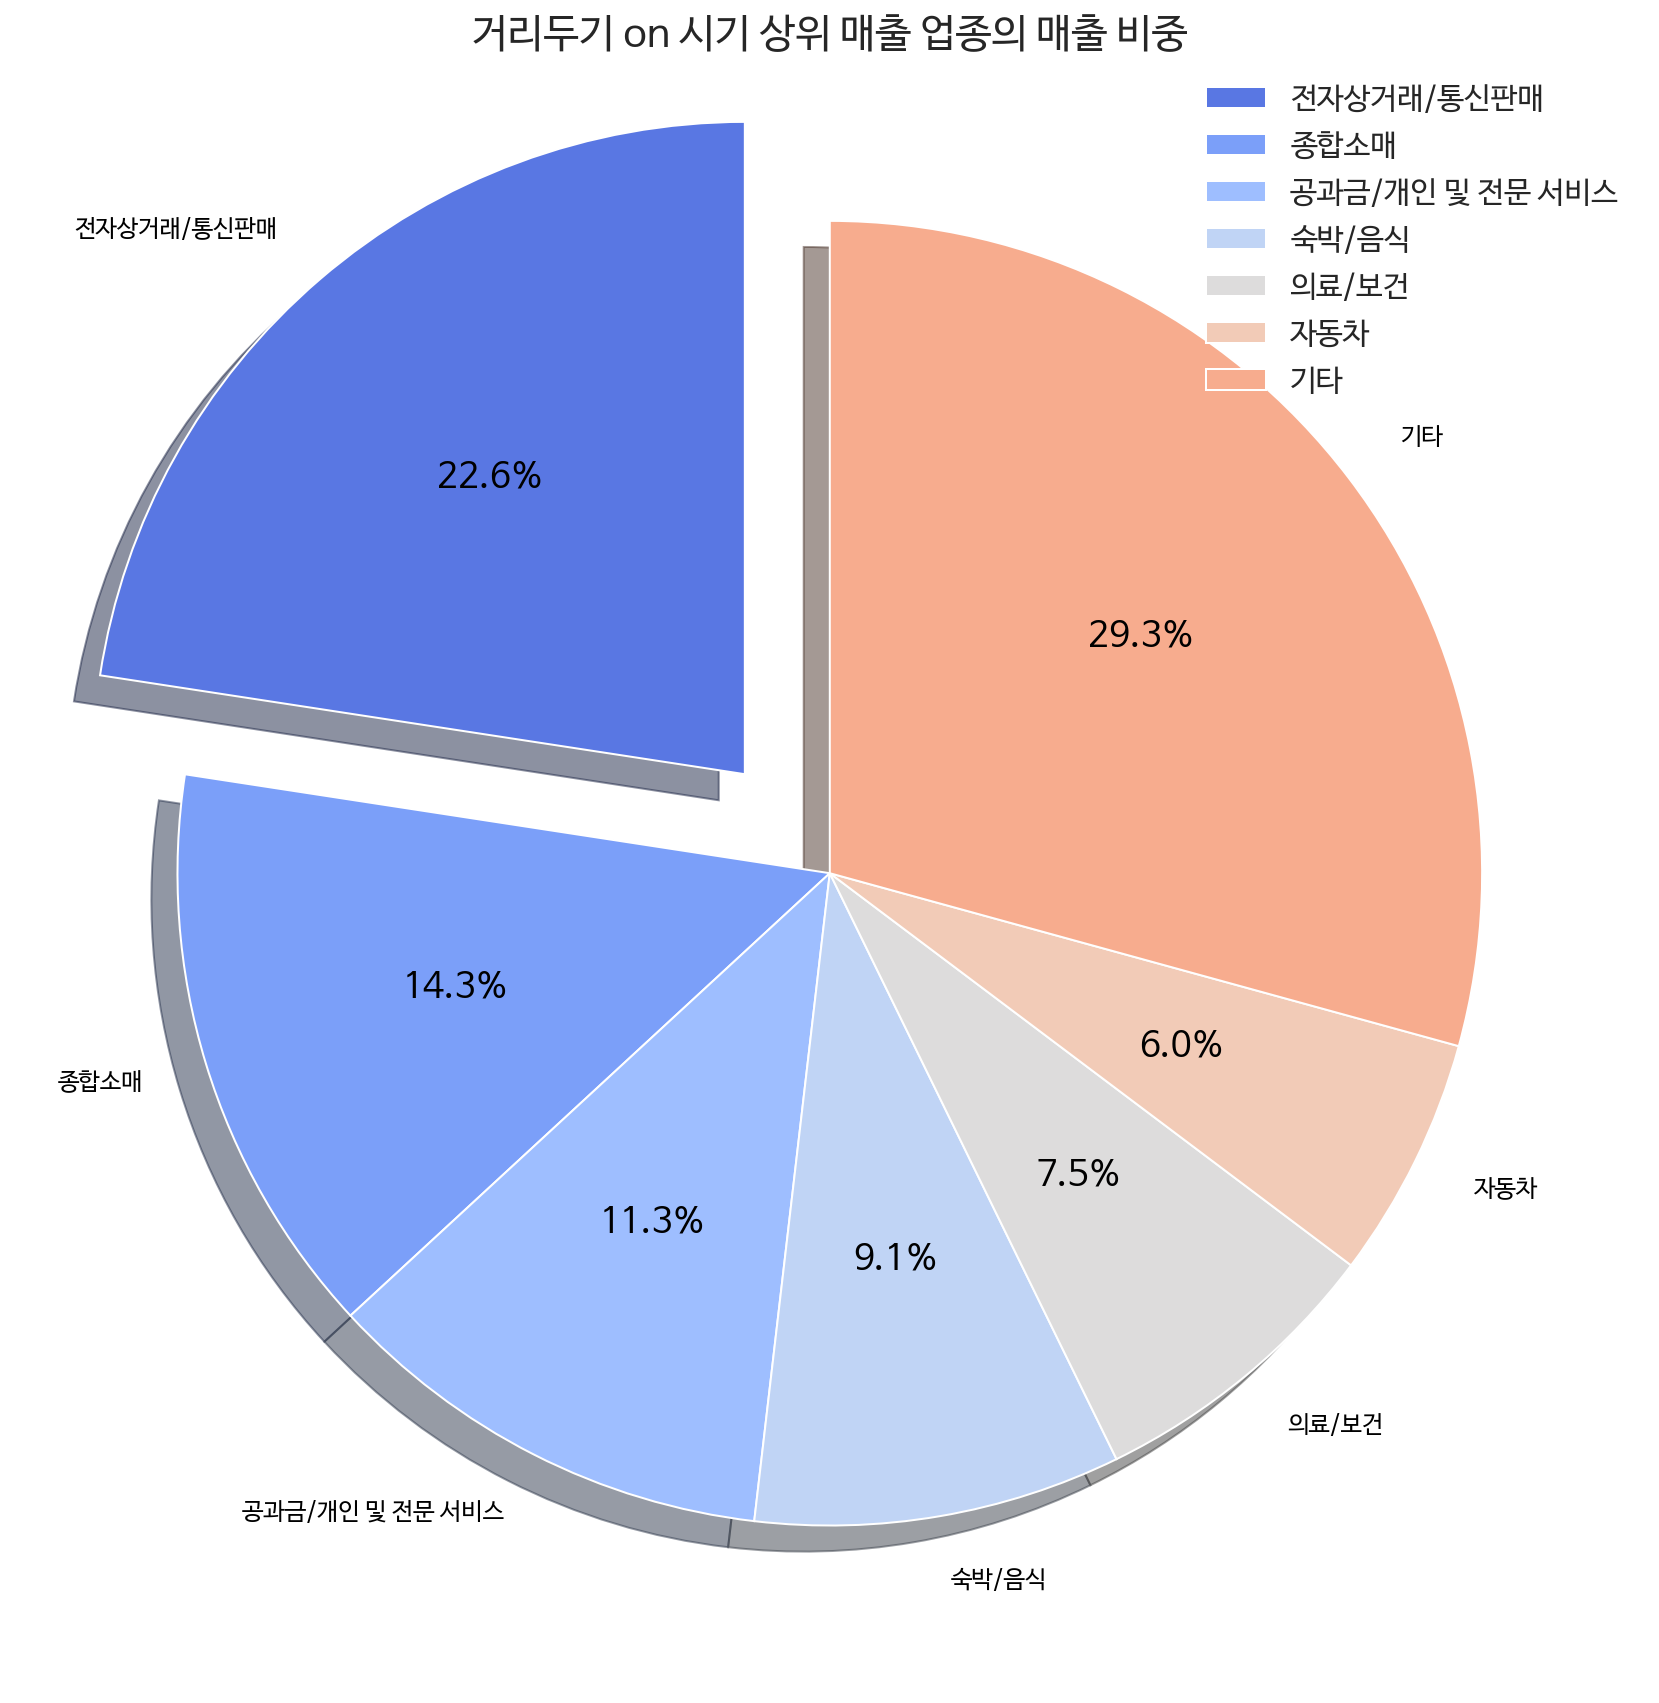

In [ ]:
# 파이차트 - on 비중
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(15, 15))

colors = sns.color_palette("coolwarm",9)

labels = list(df2mean_onoff.sort_values(by='on 비중', ascending=False).iloc[[0,1,2,3,4,6],6].index[:])
labels.append('기타')

sizes = list(df2mean_onoff.sort_values(by='on 비중', ascending=False).iloc[[0,1,2,3,4,6],6])
sizes.append(df2mean_onoff.sort_values(by='on 비중', ascending=False).iloc[7:,6].sum() + 7.4)  # 나머지 업종들을 다 '기타' 업종으로 묶어서 처리


explode = (0.2, 0, 0, 0, 0, 0, 0)

patches, texts, autotexts = plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    startangle=90
)

# label 텍스트 스타일링
for t in texts:
  t.set_fontsize(12)
  t.set_color('black')

# pie 위의 텍스트에 대한 스타일링
for t in autotexts:
  t.set_fontsize(18)
  t.set_color('black')
  
plt.title("거리두기 on 시기 상위 매출 업종의 매출 비중", fontsize = 20)
plt.legend(labels,loc='upper right', frameon=False, fontsize = 15)
plt.show()


### 데이터 정제2 (상위매출 업종의 카테고리들만 확인)
- off 일때 상위매출 : 전자상거래-> 종합소매-> 숙박/음식-> 공과금-> 의료/보건-> 연료
        2.전자상거래/ 통신판매
        1.종합소매(5)
          : 백화점, 대형마트/ 유통전문점, 슈퍼마켓, 편의점, 면세점
        12.숙박/음식(2)
          : 숙박, 음식점
        13.공과금/개인 및 전문 서비스
        7.의료/보건(2)
          : 종합병원, 일반병의원/기타의료기관
        5.연료

- on 일때 상위매출 : 전저상거래-> 종합소매->공과금->숙박/음식-> 의료/보건-> 자동차
        2.전자상거래/ 통신판매
        1.종합소매(5)
          : 백화점, 대형마트/ 유통전문점, 슈퍼마켓, 편의점, 면세점
        13.공과금/개인 및 전문 서비스
        12.숙박/음식(2)
          : 숙박, 음식점
        7.의료/보건(2)
          : 종합병원, 일반병의원/기타의료기관
        8.자동차(3)
          : 국산자동차신품, 기타운송수단, 자동차부품 및 정비



In [ ]:
# 테스트(off) - 업종들 합계
d= credit_df.groupby('업종명').sum()
d = d.loc[:,d.columns[:] <= '2020/02']
d.iloc[:-1,:].sum()

2019/01    144955065
2019/02    139006309
2019/03    143538312
2019/04    145304127
2019/05    148739586
2019/06    145315148
2019/07    149069744
2019/08    146048560
2019/09    146404888
2019/10    150319658
2019/11    155810300
2019/12    156153453
2020/01    152688839
2020/02    142296862
dtype: int64

In [ ]:
# 테스트(off) - 업종명= 합계 데이터
d.iloc[-1,:]

2019/01    144955073
2019/02    139006312
2019/03    143538310
2019/04    145304111
2019/05    148739569
2019/06    145315149
2019/07    149069740
2019/08    146048559
2019/09    146404890
2019/10    150319666
2019/11    155810305
2019/12    156153444
2020/01    152688838
2020/02    142296865
Name: 합계, dtype: int64

In [ ]:
# 테스트(off) - 오차 구하기
d.iloc[-1,:] - d.iloc[:-1,:].sum()

2019/01     8
2019/02     3
2019/03    -2
2019/04   -16
2019/05   -17
2019/06     1
2019/07    -4
2019/08    -1
2019/09     2
2019/10     8
2019/11     5
2019/12    -9
2020/01    -1
2020/02     3
dtype: int64

**업종명 == 합계 데이터와 업종들 다 더한 합계사이에 오차가 조금 있긴하다. 오차때문에 업종별 비중 구했을때 비중들 다 합쳐서 100 이 안될수있음.**

In [ ]:
#  테스트(off) - 업종별 평균 구하기
f = d.T.reset_index()
f.rename(columns={'index' : '월별'}, inplace = True)
g = f.iloc[:,1:].mean()
g

업종명
  　가구              6.019213e+05
  　가전제품/정보통신기기     3.521043e+06
  　건강보조식품          2.371967e+05
  　국산자동차신품         4.949734e+06
  　기타운송수단          4.242436e+05
  　대중교통            1.944222e+06
  　대형마트/유통전문점      9.146915e+06
  　면세점             5.664122e+05
  　백화점             4.229288e+06
  　복식잡화            3.153743e+05
  　서적/문구           9.429070e+05
  　숙박              8.464752e+05
  　슈퍼마켓            5.837115e+06
  　스포츠/오락/여가       3.394334e+06
  　시계/귀금속/안경       6.683826e+05
  　여행사/자동차임대       3.952684e+05
  　음식점             1.611037e+07
  　의복/직물           1.986481e+06
  　일반병의원/기타의료기관    9.113276e+06
  　일반식료품           2.346578e+06
  　자동차 부품 및 정비     2.224055e+06
  　종합병원            2.353207e+06
  　편의점             2.429063e+06
  　항공사             1.308993e+06
  　화장품             7.662434e+05
공과금/개인 및 전문 서비스    1.558394e+07
교육                 3.665948e+06
금융/보험              6.051135e+06
기타                 1.099224e+07
연료                 8.518386e+06
전자상거래/통신판매         2.607574e+07
합계  

In [ ]:
#  테스트(off) -  큰업종 = 세분화 카테고리인 '전자상거래/통신판매' 평균을 기준으로 평균 잘 구해졌나 확인하기
df2mean_onoff.iloc[1,0] == int(f.iloc[:,1:].mean()['전자상거래/통신판매'])

True

In [ ]:
# 테스트(off) - off 비중 구하기
j = g.reset_index().rename(columns={ 0 :' off 평균'})
j['off 비중'] = j.iloc[:,1] / j.iloc[-1,1] *100
j['off 비중'] = np.round(j['off 비중'],1)
j

,업종명,off 평균,off 비중
0,가구,6.019213e+05,0.4
1,가전제품/정보통신기기,3.521043e+06,2.4
2,건강보조식품,2.371967e+05,0.2
3,국산자동차신품,4.949734e+06,3.4
4,기타운송수단,4.242436e+05,0.3
5,대중교통,1.944222e+06,1.3
6,대형마트/유통전문점,9.146915e+06,6.2
7,면세점,5.664122e+05,0.4
8,백화점,4.229288e+06,2.9
9,복식잡화,3.153743e+05,0.2


In [ ]:
# 테스트(off) - 비중 잘 구해졌나 확인하기
j.iloc[:-1,2].sum() == j.iloc[-1,2]

False

In [ ]:
j.iloc[:-1,2].sum()

100.3

**아까 위에 써놨던대로 합계 오차때문에 100 조금 넘게 나오는듯함.**

In [ ]:
# 도넛차트로 상위 6개의 세분화된 업종들 바깥에 표시해주기
#데이터 정제
df3 = credit_df.groupby('업종명').sum()
df3 = df3.T.reset_index()
df3.rename(columns={'index' : '월별'}, inplace = True)

# off 시기
df3_off = df3[df3['월별'] <= '2020/02']
df3mean_onoff = df3_off.iloc[:,1:].mean().reset_index().rename(columns={ 0 :' off 평균'})

#on 시기
df3_on = df3[df3['월별'] > '2020/02']
df3mean_onoff['on 평균'] = list(df3_on.iloc[:,1:].mean())

# off 비중
df3mean_onoff['off 비중'] = df3mean_onoff.iloc[:,1] / df3mean_onoff.iloc[-1,1] *100
df3mean_onoff['off 비중'] = np.round(df3mean_onoff['off 비중'],1)

#on 비중
df3mean_onoff['on 비중'] = df3mean_onoff.iloc[:,2] / df3mean_onoff.iloc[-1,2] *100
df3mean_onoff['on 비중'] = np.round(df3mean_onoff['on 비중'],1)

# off -> on 비중변화비
df3mean_onoff['비중변화정도(on-off)'] = df3mean_onoff['on 비중'] - df3mean_onoff['off 비중']
# df3mean_onoff['off->on 비중변화비'] = np.round(df3mean_onoff['off->on 비중변화비'],2)

df3mean_onoff

,업종명,off 평균,on 평균,off 비중,on 비중,비중변화정도(on-off)
0,가구,6.019213e+05,6.273387e+05,0.4,0.4,0.0
1,가전제품/정보통신기기,3.521043e+06,3.752342e+06,2.4,2.3,-0.1
2,건강보조식품,2.371967e+05,2.193429e+05,0.2,0.1,-0.1
3,국산자동차신품,4.949734e+06,6.620627e+06,3.4,4.1,0.7
4,기타운송수단,4.242436e+05,5.346731e+05,0.3,0.3,0.0
5,대중교통,1.944222e+06,1.498433e+06,1.3,0.9,-0.4
6,대형마트/유통전문점,9.146915e+06,9.611711e+06,6.2,6.0,-0.2
7,면세점,5.664122e+05,1.394490e+05,0.4,0.1,-0.3
8,백화점,4.229288e+06,4.396569e+06,2.9,2.8,-0.1
9,복식잡화,3.153743e+05,2.921812e+05,0.2,0.2,0.0


**큰 카테고리에서 상위 6위 매출 업종에 속한 업종들만 모으고  
어떤 지역의 매출이 높은지도, 제일 적은지도 추가(on/off)로 나눠서 만들기**

In [ ]:
# off 비중
df3a3_off = df3mean_onoff.iloc[[30,8,6,12,22,7,11,16,25,21,18,29],[0,3,5]]
df3a3_off

,업종명,off 비중,비중변화정도(on-off)
30,전자상거래/통신판매,17.7,4.9
8,백화점,2.9,-0.1
6,대형마트/유통전문점,6.2,-0.2
12,슈퍼마켓,4.0,-0.3
22,편의점,1.6,0.1
7,면세점,0.4,-0.3
11,숙박,0.6,-0.2
16,음식점,10.9,-2.3
25,공과금/개인 및 전문 서비스,10.6,0.7
21,종합병원,1.6,-0.1


In [ ]:
# 업종명만 뽑아오기
df3a3_off['업종명']

30         전자상거래/통신판매
8                　백화점
6         　대형마트/유통전문점
12              　슈퍼마켓
22               　편의점
7                　면세점
11                　숙박
16               　음식점
25    공과금/개인 및 전문 서비스
21              　종합병원
18      　일반병의원/기타의료기관
29                 연료
Name: 업종명, dtype: object

In [ ]:
# df3a3_off 에 매출1위 지역 추가해주기
a=[]
b=[]
for i in df3a3_off['업종명']:
  a.append(off_df[off_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[0])
  c = off_df[off_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[-1]
  
  if c == '기타':
    b.append(off_df[off_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[-2])
  else:
    b.append(off_df[off_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[-1])

df3a3_off['매출 최상위 지역'] = a
df3a3_off['매출 최하위 지역'] = b
df3a3_off

,업종명,off 비중,비중변화정도(on-off),매출 최상위 지역,매출 최하위 지역
30,전자상거래/통신판매,17.7,4.9,서울,충북
8,백화점,2.9,-0.1,서울,제주
6,대형마트/유통전문점,6.2,-0.2,경기,제주
12,슈퍼마켓,4.0,-0.3,경기,제주
22,편의점,1.6,0.1,경기,울산
7,면세점,0.4,-0.3,서울,광주
11,숙박,0.6,-0.2,서울,광주
16,음식점,10.9,-2.3,서울,울산
25,공과금/개인 및 전문 서비스,10.6,0.7,서울,제주
21,종합병원,1.6,-0.1,서울,제주


**on 도 off랑 똑같이해주기**

In [ ]:
# on 비중
df3a3_on = df3mean_onoff.iloc[[30,8,6,12,22,7,25,11,16,21,18,3,4,20],[0,4,5]]
df3a3_on

,업종명,on 비중,비중변화정도(on-off)
30,전자상거래/통신판매,22.6,4.9
8,백화점,2.8,-0.1
6,대형마트/유통전문점,6.0,-0.2
12,슈퍼마켓,3.7,-0.3
22,편의점,1.7,0.1
7,면세점,0.1,-0.3
25,공과금/개인 및 전문 서비스,11.3,0.7
11,숙박,0.4,-0.2
16,음식점,8.6,-2.3
21,종합병원,1.5,-0.1


In [ ]:
# df3a3_on 에 매출1위 지역 추가해주기
a=[]
b=[]
for i in df3a3_on['업종명']:
  a.append(on_df[on_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[0])
  c = on_df[on_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[-1]
  
  if c == '기타':
    b.append(on_df[on_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[-2])
  else:
    b.append(on_df[on_df['업종명'] == i].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False).index[-1])
df3a3_on['매출 최상위 지역'] = a
df3a3_on['매출 최하위 지역'] = b
df3a3_on

,업종명,on 비중,비중변화정도(on-off),매출 최상위 지역,매출 최하위 지역
30,전자상거래/통신판매,22.6,4.9,서울,충북
8,백화점,2.8,-0.1,서울,제주
6,대형마트/유통전문점,6.0,-0.2,경기,울산
12,슈퍼마켓,3.7,-0.3,경기,제주
22,편의점,1.7,0.1,경기,울산
7,면세점,0.1,-0.3,제주,전북
25,공과금/개인 및 전문 서비스,11.3,0.7,서울,제주
11,숙박,0.4,-0.2,서울,광주
16,음식점,8.6,-2.3,경기,울산
21,종합병원,1.5,-0.1,서울,제주


**면세점 매출만 확인**

In [ ]:
off_df[off_df['업종명'] == '  \u3000면세점'].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False)

지역
서울    243788.142857
인천    181087.071429
제주     88749.785714
부산     42131.000000
경기      3675.857143
대구      2763.785714
기타      2381.928571
경남       665.714286
전남       469.071429
전북       237.642857
울산       153.857143
충북       145.857143
강원       136.928571
충남        11.857143
대전         5.285714
경북         4.357143
광주         4.071429
dtype: float64

In [ ]:
on_df[on_df['업종명'] == '  \u3000면세점'].drop('업종명',axis=1).set_index('지역').T.mean().sort_values(ascending = False)

지역
제주    99456.739130
서울    28723.217391
인천     8851.478261
부산     1371.869565
기타      486.217391
경남      315.478261
경기      143.260870
대구       36.608696
강원       21.782609
울산       16.217391
광주        6.565217
충남        4.695652
전남        3.521739
경북        3.391304
충북        3.130435
대전        2.869565
전북        2.000000
dtype: float64

### 시각화2 (큰 카테고리 상위 6위까지의 세분화 카테고리)

#### off

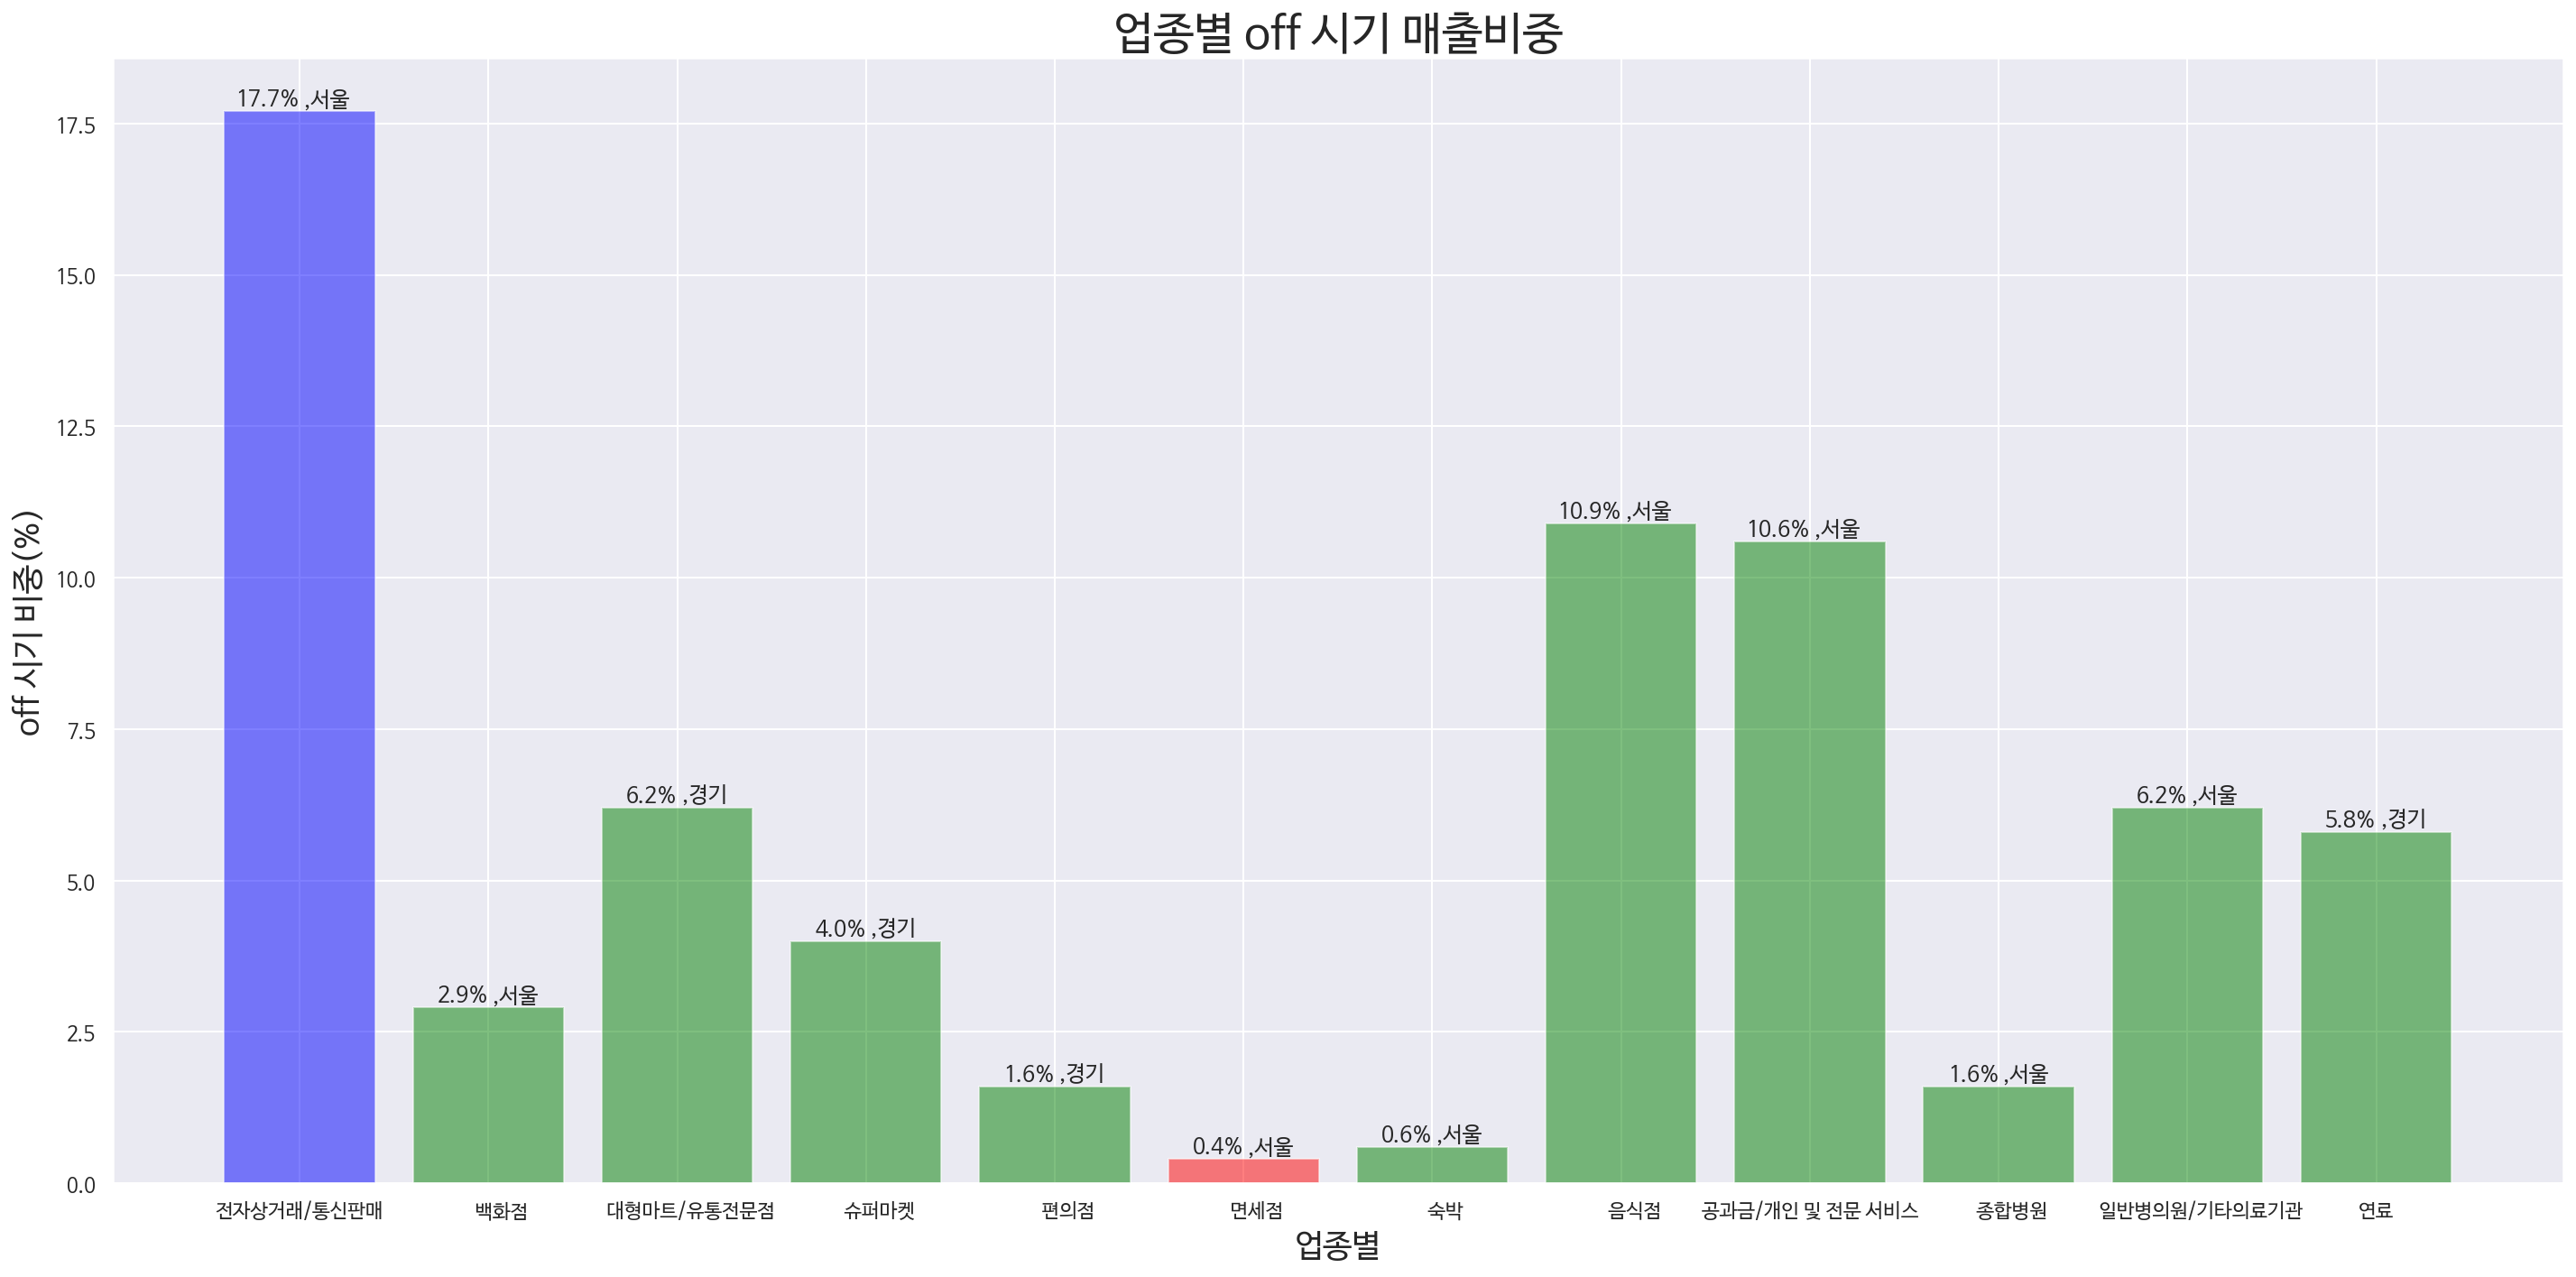

In [ ]:
# 매출 최상위 지역 그래프 위에 표시해주기
plt.rc('font', family='NanumBarunGothic')

x = df3a3_off['업종명']
y = df3a3_off['off 비중']

fig = plt.figure(figsize=(20,10))

ax = plt.bar(x, y,color = colors, alpha=0.5)

colors = ['green' for _ in range(len(x))]
colors[0] = 'blue'
colors[5] = 'red'

pr = df3a3_off['매출 최상위 지역'].to_list()

for rect,prr in zip(ax,pr):
    height = rect.get_height()
    height2 = prr
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='right', va='bottom', size = 12)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, ' ,{}'.format(height2) , ha='left', va='bottom', size = 12)


plt.xlabel('업종별', fontsize=18)
plt.ylabel('off 시기 비중(%)',fontsize=18)
plt.title('업종별 off 시기 매출비중',fontsize = 25)

plt.tight_layout()
plt.show()

#### on

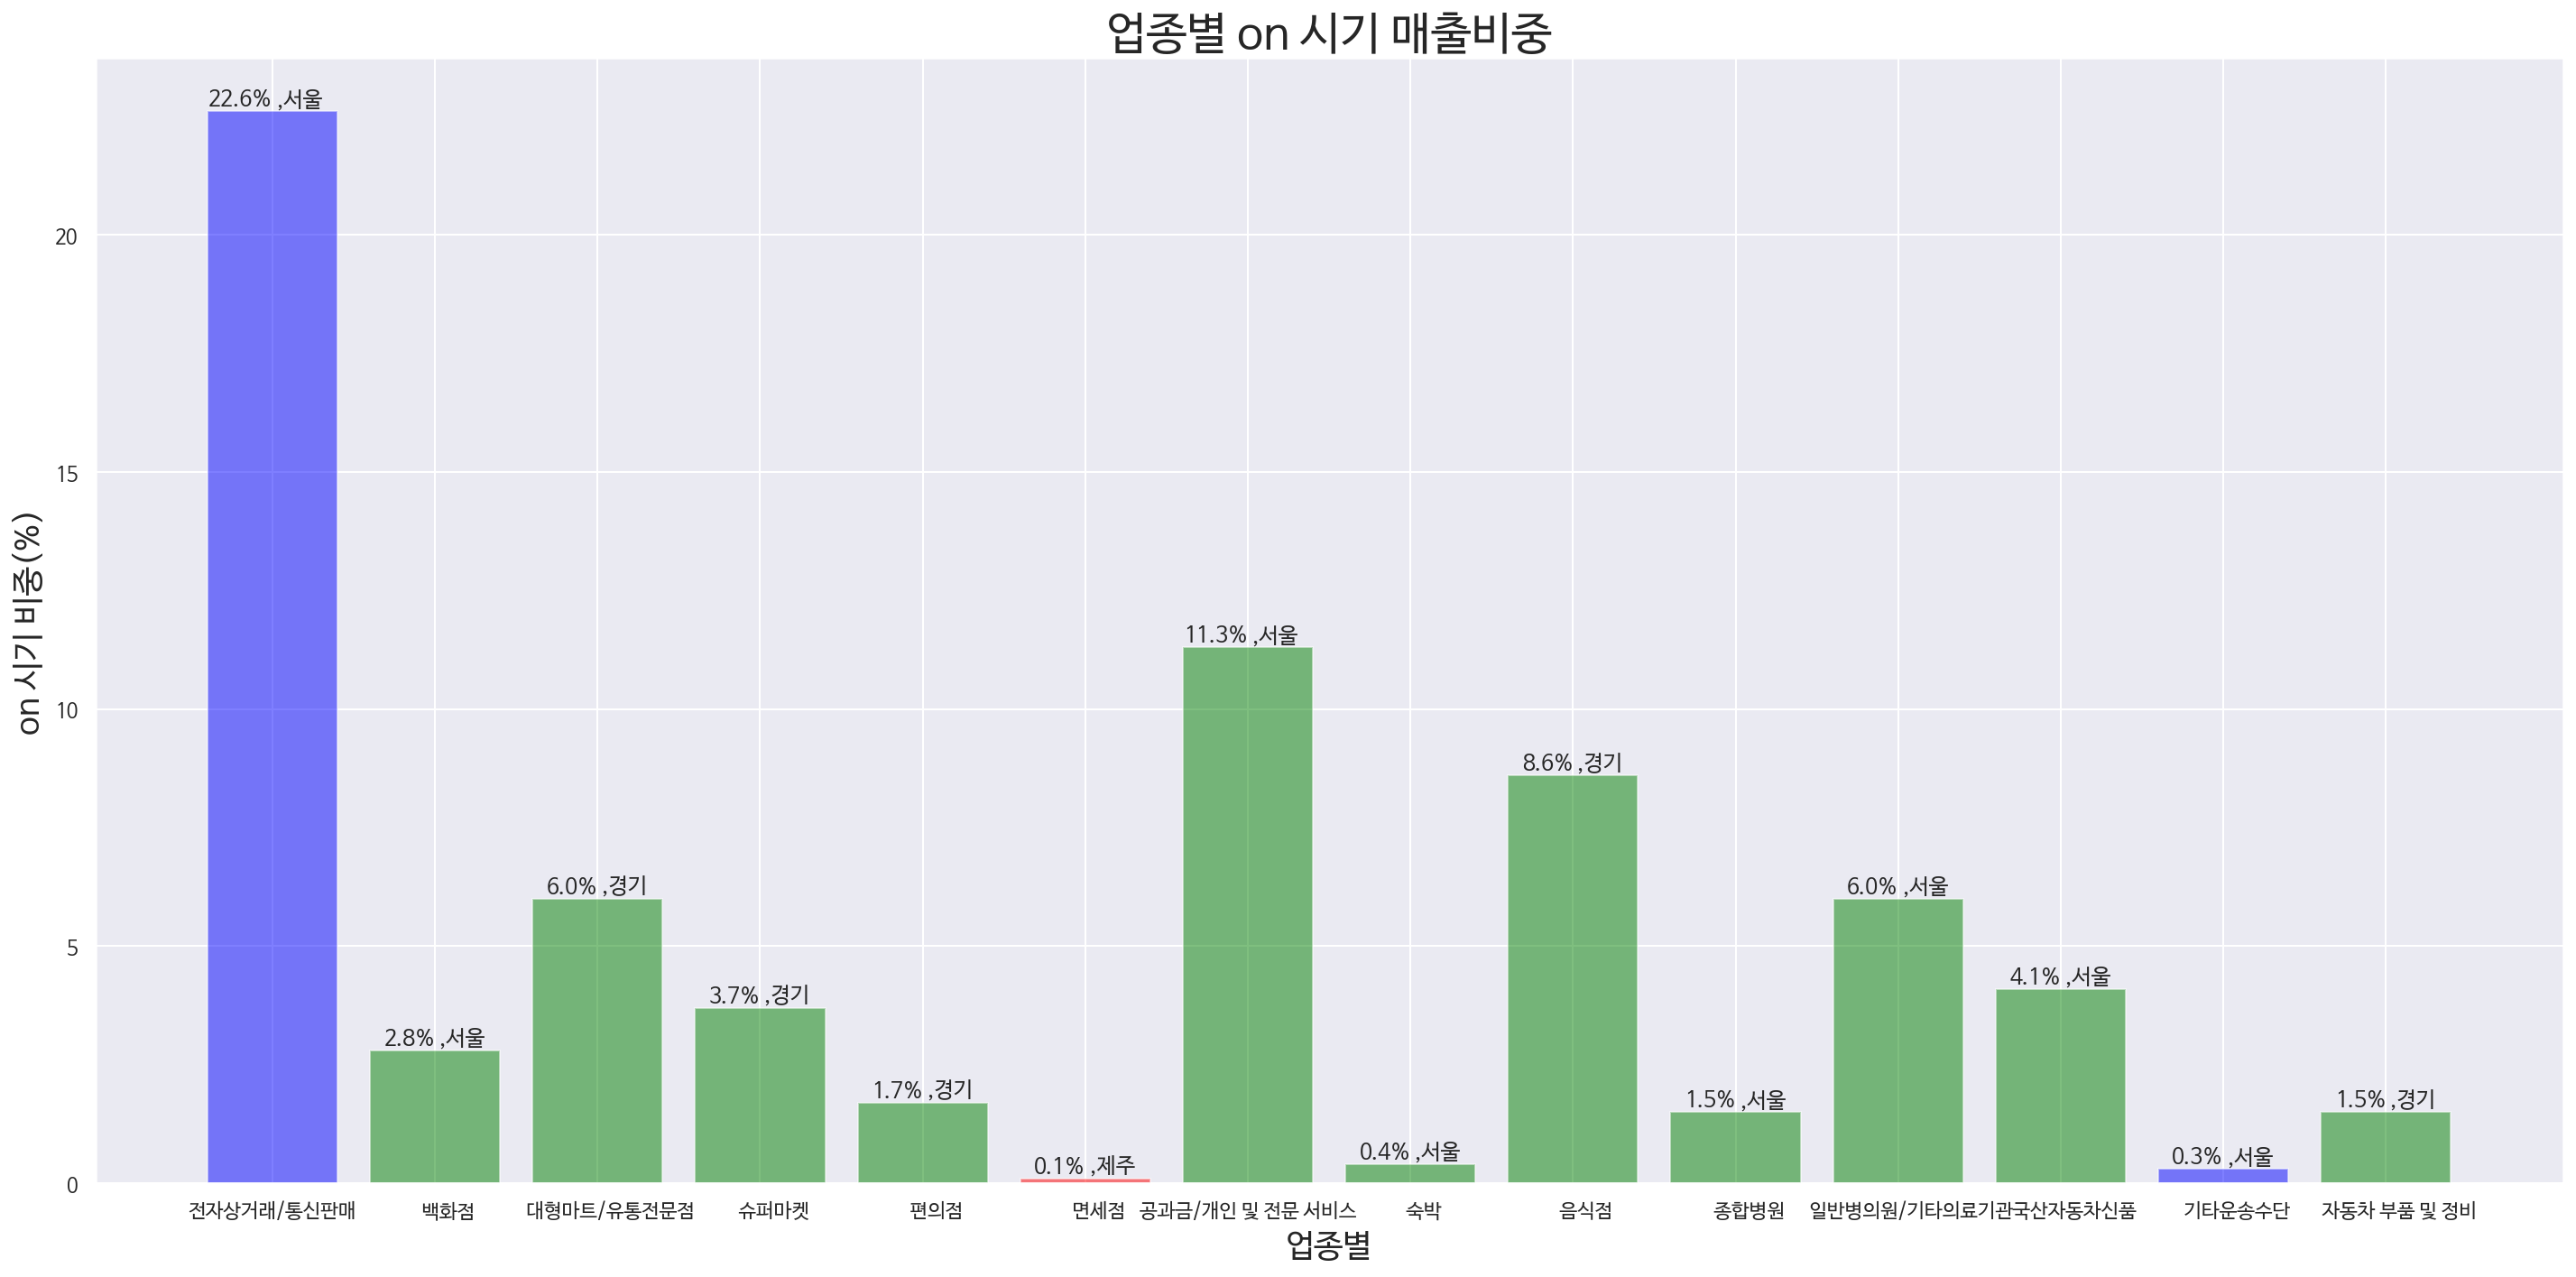

In [ ]:
# on 시기
plt.rc('font', family='NanumBarunGothic')

x = df3a3_on['업종명']
y = df3a3_on['on 비중']

fig = plt.figure(figsize=(20,10))

ax = plt.bar(x, y,color = colors, alpha=0.5)

colors = ['green' for _ in range(len(x))]
colors[0] = 'blue'
colors[5] = 'red'

pr = df3a3_on['매출 최상위 지역'].to_list()

for rect,prr in zip(ax,pr):
    height = rect.get_height()
    height2 = prr
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f%%' % height, ha='right', va='bottom', size = 12)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, ' ,{}'.format(height2) , ha='left', va='bottom', size = 12)


plt.xlabel('업종별', fontsize=18)
plt.ylabel('on 시기 비중(%)',fontsize=18)
plt.title('업종별 on 시기 매출비중',fontsize = 25)

plt.tight_layout()
plt.show()